# Machine Learning con applicazioni
Laura Nasella, matr. n° 961410.

Progetto per il corso di "Machine Learning con applicazioni" dell'Università degli Studi di Milano, A.A. 2021-2022

# Metodi di Regressione applicati a un dataset di macchine usate per la predizione del loro prezzo
## 1 - Introduzione
L'obiettivo del progetto qui descritto è di studiare le caratteristiche e le correlazioni presenti in un *dataset* di circa 100000 macchine usate al fine di costruire modelli di regressione che, date le informazioni relative a una macchina usata, riesca a predirne correttamente il prezzo. Per fare ciò nell'ambito del *Machine Learning* esistono diversi strumenti che possono essere usati per fare regressioni e alcuni tra essi saranno utilizzati in questa analisi in diverse forme, in particolare:
- diversi metodi di **Regressione Lineare** saranno testati nel Paragrafo 3, migliorando gradualmente le prestazioni dei modelli e cercando di capire quali sono i fattori che influiscono maggiormente in questi miglioramenti;
- nel Paragrafo 4 alcuni modelli con **Alberi Decisionali** porteranno a risultati ancora migliori della regressione lineare e anche in questo caso si faranno valutazioni sulle caratteristiche dei modelli migliori;
- nel Paragrafo 5 sono effettuati test con **Random Forests** per vedere se i risultati ottenuti con gli Alberi Decisionali possono ancora essere migliorati;
- nel Paragrafo 6 qualche esempio di semplice **Feed Forward Neural Network** mostra le potenzialità di questa altra tecnica nell'ambito delle regressioni.

## 2 - Preparazione del *dataset*
Il [dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes) utilizzato, scelto da una vasta selezione di *dataset* presenti nel sito [Kaggle](https://www.kaggle.com/), consiste di diversi *files*, ognuno corrispondente alla casa automobilistica di produzione (Audi, BMW, Ford, Hyundai, Mercedes-Benz, ŠKODA, Toyota, Vauxhall, Volkswagen), per un totale di circa 100000 macchine usate del Regno Unito. Per ogni macchina sono descritte in 9 colonne le principali caratteristiche: 
* **model**: è il modello della macchina, può assumere molti diversi valori per ogni casa di produzione, ad esempio per Audi può essere A1, A3, A4, A6, Q3 e molti altri;
* **year**: è l'anno di produzione della macchina e quindi una variabile numerica intera (discreta);
* **transmission**: è il tipo di cambio, come valori può assumere: *transmission* = {*Manual*, *Automatic*, *Semi-Auto*}. Potendo assumere solo 3 valori discreti non numerici è una variabile categorica;
* **mileage**: è la distanza percorsa in miglia (1 mi ≈ 1609,34 m) dall'automobile e assumerà quindi valori numerici reali; 
* **fuelType**: è il tipo di carburante utilizzato per l'alimentazione del motore. E' anch'esso una variabile categorica dato che *fuelType* = {*Diesel*, *Petrol*, *Hybrid*, *Electric*};
* **tax**: sono le tasse da pagare in base al tipo di macchina e ai suoi connotati: in generale le automobili più *eco-friendly* hanno meno tasse da pagare, quelle prodotte prima del 1973 sono esenti, le macchine più inquinanti pagano tasse maggiori... Questa caratteristica sarà quindi correlata agli altri predittori presenti nel *dataset*;
* **mpg**: *mpg* sta per *miles per gallon* ovvero il numero di miglia percorse per ogni gallone, dove 1 gal(UK) ≈ 4.54609 litri;
* **engineSize**: è la dimensione del motore valutata in litri di carburante contenuto;
* **price**: è il prezzo in sterline £ della macchina considerata. E' la variabile continua a cui siamo interessati, il *target* dell'analisi e sarà quindi considerata come variabile di *output* y dipendente dalle 8 caratteristiche precedenti (chiamate anche *features*, predittori o variabili di *input* x).

Come primo passo ho importato i vari *files* in formato `.csv` in un DataFrame, importante classe della libreria Python [*Pandas*](https://pandas.pydata.org/), che permette di manipolare agevolmente dati sotto forma di tabelle e matrici. Altre librerie utilizzate in seguito sono [*Matplotlib*](https://matplotlib.org/) e [*NumPy*](https://numpy.org/). Man mano che ho aggiunto i diversi *files* corrispondenti alle diverse case automobilistiche per creare un unico *dataset*, ho aggiunto anche una colonna di nome **carManufacturer** per indicare il *label* della casa automobilistica di provenienza. Nel codice sottostante sono descritte altre piccole modifiche che sono state necessarie per rendere il *dataset* facilmente usabile nel seguito della trattazione come:
- nel file `hyundi.csv` la colonna 'tax(£)' è stata rinominata '**tax**' per renderla compatibile con gli altri *files*;
- è stata eliminata la riga #39175 dato che ha **year** = 2060 che chiaramente non è un valore valido;
- alcune macchine hanno **engineSize** = 0 e sono state eliminate;
- 8 macchine hanno **transmission** != {Manual, Automatic, Semi-Auto} ma hanno **transmission** = "Other". Non essendo "Other" un valore chiaro da usare e solo 8 le macchine problematiche (su circa 100000 macchine è un numero trascurabile), le elimino;
- alcune macchine hanno **fuelType** != {Diesel, Petrol, Hybrid, Electric} ma hanno "Other". Per lo stesso ragionamento del punto precedente è meglio rimuovere queste righe.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import json

fileName_audi = "DataFiles/audi.csv"
fileName_bmw = "DataFiles/bmw.csv"
fileName_ford = "DataFiles/ford.csv"
fileName_hyundai = "DataFiles/hyundi.csv"
fileName_merc = "DataFiles/merc.csv"
fileName_skoda = "DataFiles/skoda.csv"
fileName_toyota = "DataFiles/toyota.csv"
fileName_vauxhall = "DataFiles/vauxhall.csv"
fileName_vw = "DataFiles/vw.csv"

#Aggiungo una colonna per indicare la casa automobilistica 
df_audi = pd.read_csv(fileName_audi)
df_audi = df_audi.assign(carManufacturer='Audi')
df_bmw = pd.read_csv(fileName_bmw)
df_bmw = df_bmw.assign(carManufacturer='BMW')
df_ford = pd.read_csv(fileName_ford)
df_ford = df_ford.assign(carManufacturer='Ford')
df_merc = pd.read_csv(fileName_merc)
df_merc = df_merc.assign(carManufacturer='Mercedes') 
df_skoda = pd.read_csv(fileName_skoda)
df_skoda = df_skoda.assign(carManufacturer='Skoda') 
df_toyota = pd.read_csv(fileName_toyota)
df_toyota = df_toyota.assign(carManufacturer='Toyota') 
df_vauxhall = pd.read_csv(fileName_vauxhall)
df_vauxhall = df_vauxhall.assign(carManufacturer='Vauxhall') 
df_vw = pd.read_csv(fileName_vw)
df_vw = df_vw.assign(carManufacturer='Volkswagen') 
#In questo file una colonna si chiama diversamente dagli altri files, la modifico da 'tax(£)' a 'tax'
df_hyundai = pd.read_csv(fileName_hyundai) 
df_hyundai = df_hyundai.rename(columns={ 'tax(£)' : 'tax'})
df_hyundai = df_hyundai.assign(carManufacturer='Hyundai') 

df = df_audi.append([df_bmw,df_ford,df_hyundai,df_merc,df_skoda,df_toyota,df_vauxhall,df_vw], ignore_index=True) 

#Col metodo any() (che ritorna TRUE se c'è almeno un singolo punto per cui la condizione da controllare è vera) controllo se ci sono dei valori mancanti
df.isnull().values.any() 
df.isnull().sum() 

#C'è una riga con "year" = 2060, la elimino
df_drop = df[df['year'] > 2022] 
print('- Righe del DataFrame con "year" > 2022 :\n')
display(df_drop)
df = df.drop(index=39175)
df_drop = df[df['year'] > 2022] 
print('\n- Righe del DataFrame con "year" > 2022 dopo aver rimosso la riga problematica #39175 (controllo che sia un Empty DataFrame):\n')
display(df_drop)

#Alcune macchine hanno "engineSize" = 0, le elimino
df_drop = df[df['engineSize'] == 0.0] 
#print('\n-Righe del DataFrame con "engineSize" = 0.0: \n', df_drop)
#display(df_drop)
df.drop(df[(df['engineSize'] == 0.0)].index, inplace=True)
df_drop = df[df['engineSize'] == 0.0] 
print('\n- Righe del DataFrame con "engineSize" = 0.0 dopo averle rimosse (controllo che sia un Empty DataFrame): \n')
display(df_drop)

#8 macchine hanno "transmission" != {Manual, Automatic, Semi-Auto} ma hanno "Other", le elimino
df_drop = df[df['transmission'] == "Other"]
print('\n- Righe del DataFrame con "transmission" = "Other": \n')
display(df_drop)
df.drop(df[(df['transmission'] == "Other")].index, inplace=True)
df_drop = df[df['transmission'] == "Other"] 
print('\n- Righe del DataFrame con "transmission" = "Other" dopo averle rimosse (controllo che sia un Empty DataFrame): \n')
display(df_drop)

#Alcune macchine hanno "fuelType" != {Diesel, Petrol, Hybrid, Electric} ma hanno "Other", le elimino
df_drop = df[df['fuelType'] == "Other"]
#print('\n- Righe del DataFrame con "fuelType" = "Other": \n')
#display(df_drop)
df.drop(df[(df['fuelType'] == "Other")].index, inplace=True)
df_drop = df[df['transmission'] == "Other"] 
print('\n- Righe del DataFrame con "fuelType" = "Other" dopo averle rimosse (controllo che sia un Empty DataFrame): \n')
display(df_drop)

- Righe del DataFrame con "year" > 2022 :



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer
39175,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,Ford



- Righe del DataFrame con "year" > 2022 dopo aver rimosso la riga problematica #39175 (controllo che sia un Empty DataFrame):



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer



- Righe del DataFrame con "engineSize" = 0.0 dopo averle rimosse (controllo che sia un Empty DataFrame): 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer



- Righe del DataFrame con "transmission" = "Other": 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer
44153,Ioniq,2017,12495,Other,27779,Hybrid,0,78.5,1.6,Hyundai
44175,Tucson,2017,16995,Other,25915,Petrol,145,39.8,1.6,Hyundai
57036,SLK,2015,12995,Other,39000,Diesel,150,56.5,2.1,Mercedes
63519,Scala,2019,15999,Other,3500,Petrol,145,47.1,1.0,Skoda
66118,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5,Toyota
77102,Mokka,2019,19995,Other,1450,Diesel,145,57.7,1.5,Vauxhall
77717,Mokka,2019,13499,Other,3000,Petrol,145,44.8,1.4,Vauxhall
77820,Mokka,2019,22499,Other,4500,Petrol,145,42.2,1.5,Vauxhall



- Righe del DataFrame con "transmission" = "Other" dopo averle rimosse (controllo che sia un Empty DataFrame): 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer



- Righe del DataFrame con "fuelType" = "Other" dopo averle rimosse (controllo che sia un Empty DataFrame): 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer


In [2]:
print('\n- DataFrame pronto per essere utilizzato:\n')
display(df)


- DataFrame pronto per essere utilizzato:



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4,Audi
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0,Audi
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0,Audi
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4,Audi
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4,Audi


Dopo aver caricato il *dataset* nel DataFrame, è bene studiare le distribuzioni delle varie variabili per capire se ci saranno eventuali problemi di statistica o per capire se c'è qualche correlazione evidente. Come anticipato, sono presenti 4 **variabili categoriche** e 5 **variabili numeriche** (a valori continui o discreti): 

categorical_features = ['model', 'transmission', 'fuelType', 'carManufacturer']

numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

### Variabili categoriche 
La prima riga di istogrammi qui di seguito riporta la distribuzione delle 3 variabili categoriche 'transmission', 'fuelType', 'carManufacturer': per quanto concerne la caratteristica **fuelType**, essa ha poca statistica nelle classi 'Hybrid' e 'Electric'. Le variabili **transmission** e **carManufacturer** hanno invece una statistica comparabile nelle varie classi. La seconda riga di istogrammi mostra la distribuzione dei prezzi in funzione delle 3 variabili categoriche considerate: si può notare chiaramente una dipendenza del prezzo da **transmission** e **fuelType**. In particolare per il tipo di cambio questa distribuzione rispecchia ciò che ci possiamo aspettare, cioè che le macchine con cambio automatico o semi-automatico costano in genere di più di quelle con cambio manuale. Questi istogrammi sono stati fatti giusto per avere una nozione della correlazione tra la variabile di *output* e le variabili di *input* categoriche; chiaramente questa conoscenza non verrà aggiunta al modello per non introdurre nessun bias: la correlazione da considerare è solo quella tra le variabili di *input*. Nel paragrafo 3 queste variabili saranno inserite nel modello, trattandole da categoriche a numeriche, per vedere se e di quanto migliorano le performance del modello di regressione lineare (e dei modelli in seguito).

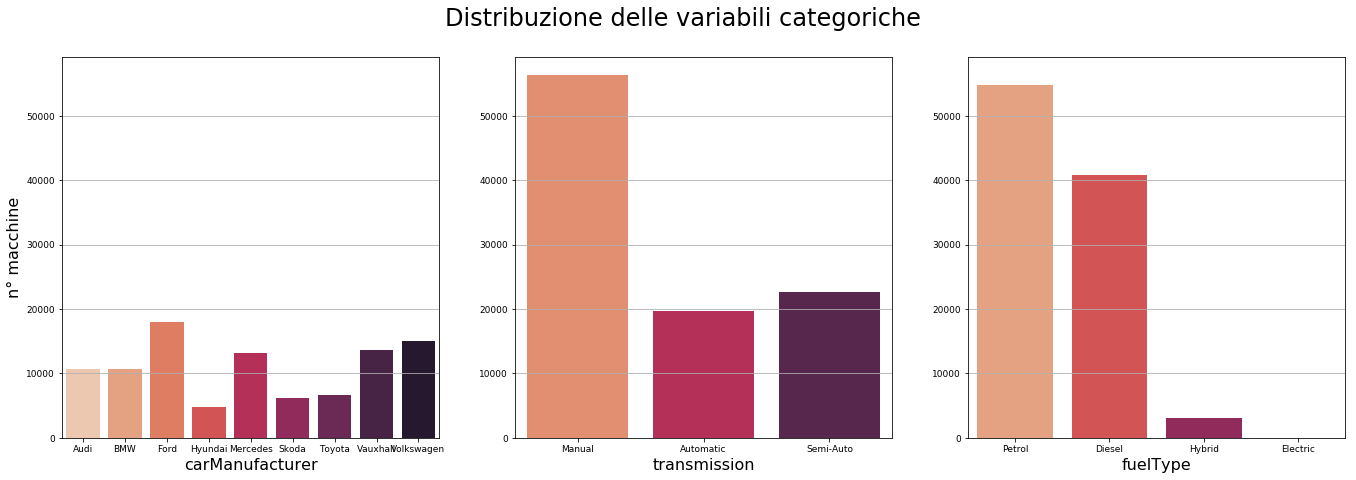

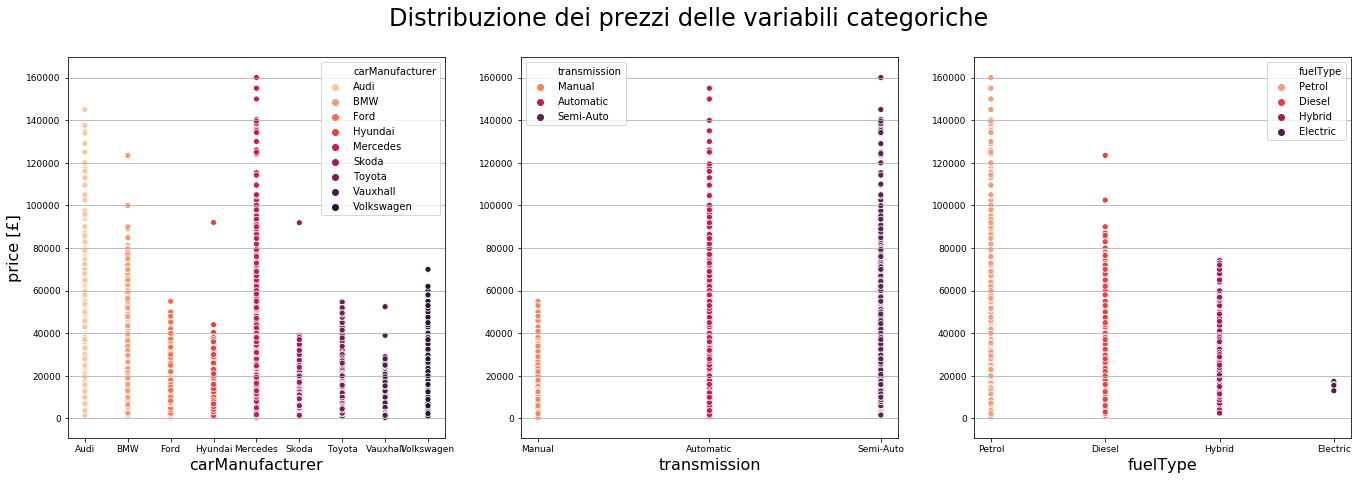

In [3]:
fig = plt.figure(figsize=(23, 7))
fig.suptitle("Distribuzione delle variabili categoriche", fontsize = 24)

ax1 = plt.subplot(131)
d1 = sns.countplot(data=df, x='carManufacturer', palette="rocket_r")
ax1.set_xlabel("carManufacturer",fontsize=16)
ax1.set_ylabel("n° macchine", fontsize=16)

ax2 = plt.subplot(132, sharey=ax1)
d2 = sns.countplot(data=df, x='transmission', palette="rocket_r")
ax2.set_xlabel("transmission",fontsize=16)
ax2.get_yaxis().get_label().set_visible(False)

ax3 = plt.subplot(133, sharey=ax1)
d3 = sns.countplot(data=df, x='fuelType', palette="rocket_r")
ax3.set_xlabel("fuelType",fontsize=16)
ax3.get_yaxis().get_label().set_visible(False)
    
fig1 = plt.figure(figsize=(23, 7))
fig1.suptitle("Distribuzione dei prezzi delle variabili categoriche", fontsize = 24)

ax4 = plt.subplot(131)
d4 = sns.scatterplot(data=df, x='carManufacturer', y='price', hue='carManufacturer', palette="rocket_r")
ax4.set_xlabel("carManufacturer",fontsize=16)
ax4.set_ylabel("price [£]", fontsize=16)

ax5 = plt.subplot(132, sharey=ax4)
d5 = sns.scatterplot(data=df, x='transmission', y='price', hue='transmission', palette="rocket_r")
ax5.set_xlabel("transmission",fontsize=16)
ax5.get_yaxis().get_label().set_visible(False)

ax6 = plt.subplot(133, sharey=ax4)
d6 = sns.scatterplot(data=df, x='fuelType', y='price', hue='fuelType', palette="rocket_r")
ax6.set_xlabel("fuelType",fontsize=16)
ax6.get_yaxis().get_label().set_visible(False)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(labelsize=9)
    ax.grid(True, axis = 'y')

### Variabili numeriche
Dopo le distribuzioni delle variabili categoriche, è interessante osservare anche quella del prezzo e delle altre variabili numeriche per iniziare a studiare le possibili correlazioni e capire quali variabili potrebbero essere più importanti nella regressione. Inizialmente sono riportati gli istogrammi delle diverse variabili numeriche: alcuni hanno code molto lunghe o presentano picchi per certi valori. Una cosa che si può notare è inoltre che esse variano su *range* di valori molto diversi, ad esempio **engineSize** varia tra 0 e 6, mentre **mileage** tra 0 e 300000. Questa differenza di scala può spesso causare non ottime *performance* di alcuni algoritmi di *Machine Learning*. Per far sì che le variabili agiscano su una stessa scala si procede con il *feature scaling* detto *standardization*, cioè dai valori viene sottratto il valore medio di quella caratteristica e poi si divide per la deviazione standard $\sigma$. In questo modo la distribuzione che si ottiene per ogni *feature* ha media $\mu = 0$ e $\sigma = 1$. Questa procedura viene effettuata in seguito nel paragrafo 3 utilizzando il *transformer* di Scikit-Learn, [*StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Anche la distribuzione del prezzo non è simmetrica: ha il massimo a valori bassi ~10000£, diminuisce in modo molto ripido da entrambi i lati ma possiede una lunga coda verso valori più alti. Dagli scatterplot sottostanti appare che le variabili correlate più chiaramente al prezzo sono **year** e **mileage**: come è logico immaginare, in generale più un macchina è vecchia e ha percorso km, meno sarà costosa. Questa è una valutazione solo a primo impatto, osservando i grafici: per avere la giusta misura di quanto le variabili siano correlate è bene calcolare matematicamente la **matrice di correlazione**.

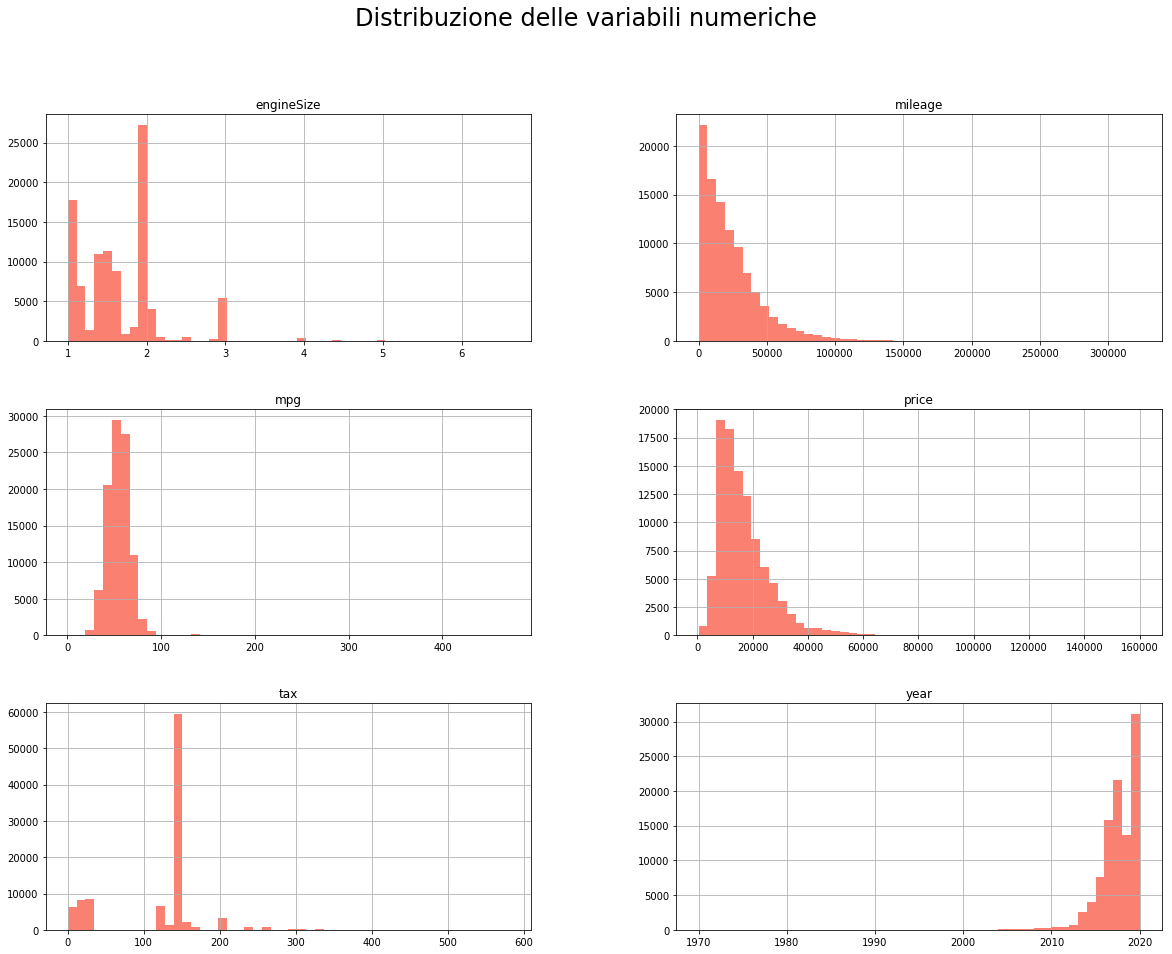

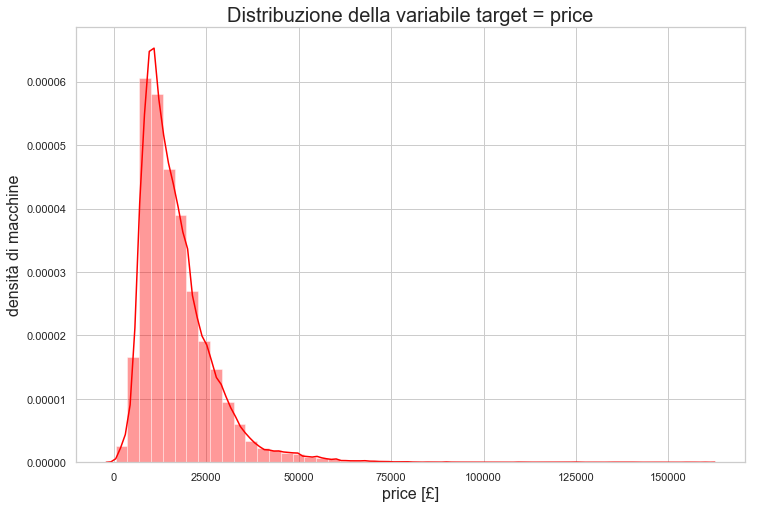

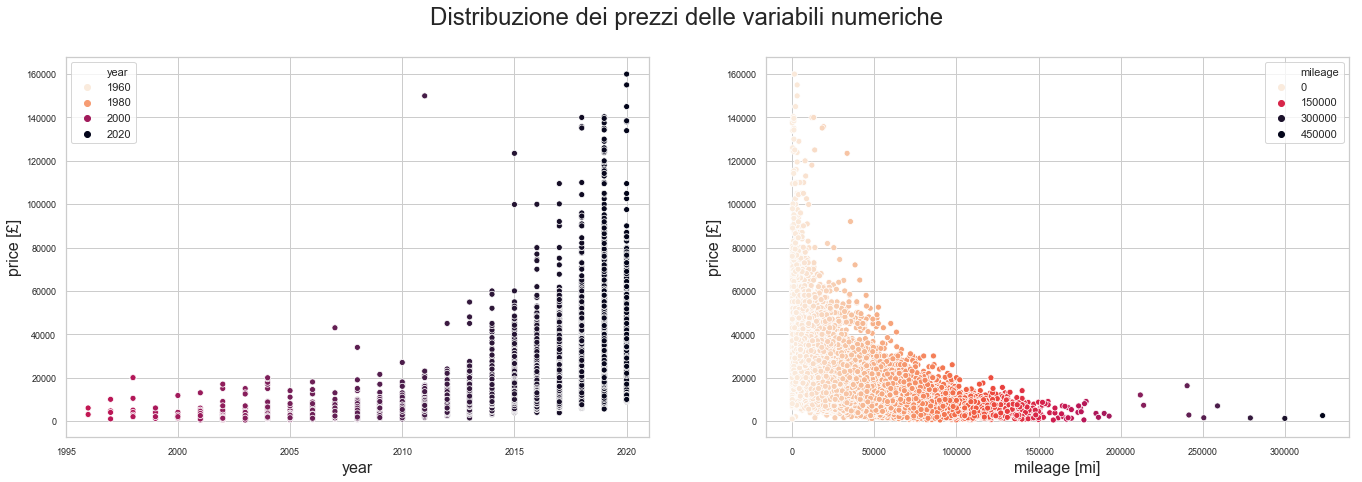

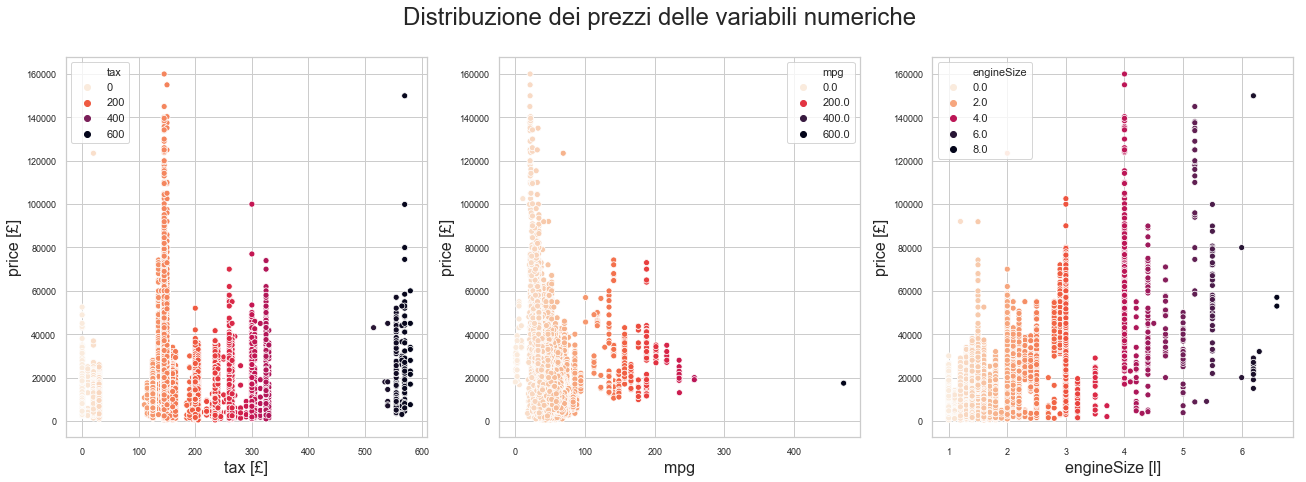

In [4]:
#Istogrammi delle variabili numeriche
df.hist(bins=50, figsize=(20,15), color='salmon')
plt.suptitle("Distribuzione delle variabili numeriche", fontsize = 24)
plt.show()

#Distribuzione della variabile 'price' nel dataset
sns.set(style = 'whitegrid', rc={'figure.figsize':(12,8)}, palette='rocket_r')
ax = sns.distplot(df['price'], bins=50, color='red')
ax.set_ylabel("densità di macchine",  fontsize=16)
ax.set_xlabel("price [£]", fontsize=16)
ax.set_title("Distribuzione della variabile target = price", fontsize=20)

fig = plt.figure(figsize=(23, 7))
fig.suptitle("Distribuzione dei prezzi delle variabili numeriche", fontsize = 24)

ax1 = plt.subplot(121)
d1 = sns.scatterplot(data=df, x='year', y='price', hue='year', palette="rocket_r", ax=ax1)
ax1.set_xlabel("year",fontsize=16)
ax1.set_ylabel("price [£]", fontsize=16)
ax1.set_xlim(1995,2021)

ax2 = plt.subplot(122)
d2 = sns.scatterplot(data=df, x='mileage', y='price', hue='mileage', palette="rocket_r")
ax2.set_xlabel("mileage [mi]",fontsize=16)
ax2.set_ylabel("price [£]", fontsize=16)

fig1 = plt.figure(figsize=(22, 7))
fig1.suptitle("Distribuzione dei prezzi delle variabili numeriche", fontsize = 24)

ax3 = plt.subplot(131)
d3 = sns.scatterplot(data=df, x='tax', y='price', hue='tax', palette="rocket_r")
ax3.set_xlabel("tax [£]",fontsize=16)
ax3.set_ylabel("price [£]", fontsize=16)

ax4 = plt.subplot(132)
d4 = sns.scatterplot(data=df, x='mpg', y='price', hue='mpg', palette="rocket_r")
ax4.set_xlabel("mpg",fontsize=16)
ax4.set_ylabel("price [£]", fontsize=16)

ax5 = plt.subplot(133)
d5 = sns.scatterplot(data=df, x='engineSize', y='price', hue='engineSize', palette="rocket_r")
ax5.set_xlabel("engineSize [l]",fontsize=16)
ax5.set_ylabel("price [£]", fontsize=16)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(labelsize=9)
    ax.grid(True, axis = 'y')

## Matrice di correlazione
In generale si considera un dominio D con più variabili di input (nel nostro esempio sono le features come *model*, *year*, *mileage*, *transmission*, *tax*, *engineSize* etc.) a formare un vettore di dimensione p, $\underline{x} \in R^{p}$ e una variabile di output y (nel nostro esempio il prezzo di vendita delle macchine usate, *price*). Supponiamo, per facilitare la trattazione, un caso semplificato con una sola variabile di input x e una variabile di output y e di avere per entrambe una serie di n campionamenti, cioè n misure:
$D = ((x_0, y_0), (x_1, y_1), ..., (x_{n-1}, y_{n-1}) = (x_i, y_i): i=0,..., n-1)$. Si assume che entrambe le variabili abbiano una qualche distribuzione di probabilità, $p(x)$ e $p(y)$, $0\leq p \leq 1$. 

Per queste variabili si possono definire alcuni valori di aspettazione e momenti particolarmente importanti, come la media e la varianza; di seguito sono riportate le principali definizioni nel caso discreto:
- Media campionata: $\overline{\mu_x} = \frac{1}{n} \sum_{i=0}^{n-1}(x_i)$;
- Varianza campionata: $\overline{\sigma_{x}^2} =\frac{1}{n-1} \sum_{i=0}^{n-1}(x_i- \overline{\mu_x})^2$, in cui ho n-1 al denominatore perchè ho perso 1 grado di libertà per la stima della media campionata;
- Covarianza campionata di due varabili x e y: $\overline{cov_{x,y}} =\frac{1}{n-1} \sum_{i=0}^{n-1}(x_i- \overline{\mu_x})(y_i- \overline{\mu_y})$.

Con "campionata" si intende che non sono la vera media e varianza del dataset che potrei ottenere sapendo la loro esatta distribuzione di probabilità (p.d.f.), ma sono la media, la varianza e la covarianza ottenute dalle misure, dai campionamenti. Ai nostri fini è particolarmente importante la covarianza: se le due variabili considerate x e y sono indipendenti e identicamente distribuite (i.i.d.), ovvero P(x,y) = p(x)p(y) allora si ottiene che hanno covarianza nulla, cioè le due variabili sono indipendenti e una variazione di una non comporta una variazione dell'altra:
$$ P(x,y) = p(x)p(y) \Rightarrow  cov(x,y) = 0 $$
Si può costruire la **matrice di covarianza** che è simmetrica e di dimensione $2\times 2$  (in questo esempio con 2 sole variabili):
$$
C[x,y] = \begin{bmatrix} cov_{x,x} & cov_{x,y} \\  
                         cov_{x,y} & cov_{y,y}
             \end{bmatrix} = \begin{bmatrix} \sigma^2_{x} & cov_{x,y} \\ 
                         cov_{x,y} & \sigma^2_{y}
             \end{bmatrix}
$$
da cui si ottiene la **matrice di correlazione** scalando ogni elemento della matrice di covarianza con le varianze:
$$
K[x,y] = \begin{bmatrix} \frac{cov_{x,x}}{\sigma^2_{x}} & \frac{cov_{x,y}}{\sqrt{\sigma^2_{x}\sigma^2_{y}}} \\  
                         \frac{cov_{x,y}}{\sqrt{\sigma^2_{x}\sigma^2_{y}}} & \frac{cov_{y,y}}{\sigma^2_{y}}
             \end{bmatrix} = \begin{bmatrix} 1 & \frac{cov_{x,y}}{\sqrt{\sigma^2_{x}\sigma^2_{y}}} \\ 
                         \frac{cov_{x,y}}{\sqrt{\sigma^2_{x}\sigma^2_{y}}} & 1
             \end{bmatrix} = \begin{bmatrix} 1 & k_{x,y} \\ 
                         k_{x,y} & 1
             \end{bmatrix}
$$
Nel caso di variabili i.i.d., dato che $cov(x,y) = 0$, si ottiene una matrice di correlazione data dalla matrice identità di dimensione 2. In generale invece, se le 2 variabili x e y non sono indipendenti ma hanno una qualche relazione tra di loro, la matrice K[x,y] non sarà l'identità, ma una matrice simmetrica più generale, in cui gli elementi fuori dalla diagonale rappresentano proprio il livello di correlazione tra le due variabili:
- se $k_{x,y} \sim 0$, le varabili sono poco correlate, quasi indipendenti;
- se 0 < $k_{x,y} < 1$, le variabili sono correlate positivamente, all'aumentare di una aumenta anche l'altra e questa relazione è più forte più $k_{x,y}$ si avvicina a 1;
- se -1 < $k_{x,y} < 0$, le variabili sono anti-correlate, all'aumentare di una, l'altra diminuisce e questa relazione è più forte più $k_{x,y}$ si avvicina a -1.

Con Pandas è possibile calcolare la matrice di correlazione molto facilmente dato un certo DataFrame, anche avendo in input più variabili $\underline{x} \in R^{p}$ e non solo una. Nella figura sottostante è riportata la matrice di correlazione calcolata con la variabile di output y = *price* e il vettore delle variabili di input numeriche x = {*year*, *mileage*, *tax*, *mpg*, *engineSize*}:  
- le variabili di input più correlate al prezzo sono *year* e *engineSize*, ovvero l'anno di produzione e la dimensione del motore valutata in litri di carburante contenuto. Questa correlazione è interessante da osservare, ma chiaramente non verrà introdotta o utilizzata in alcun modo come conoscenza a priori per non introdurre bias nei vari modelli;
- la variabili di input più correlate tra loro sono *year* e *mileage*: in particolare hanno un anti-correlazione di -0.74 dato che all'aumentare dell'anno di produzione (cioè una macchina più nuova) è logico pensare che le macchine abbiano percorso in media meno km delle auto più vecchie. Allo stesso modo anche *tax* e *mpg* sono fortemente anticorrelate (-0.52) dato che le tasse sono maggiori per le auto più fortemente inquinanti, come ad esempio quelle che percorrono meno miglia dato un tot di litri di carburante.

Di seguito è riportata anche la *scatter matrix* delle variabili, che riporta tutti i possibili scatter plot considerando due variabili alla volta sotto forma di matrice. I *plot* lungo la diagonale sono invece gli istogrammi della distribuzione di ogni singola variabile. La matrice di correlazione e la *scatter matrix* sono due facce della stessa medaglia in quanto riportano le stesse informazioni sotto due forme diverse. Ad esempio, considerando la forte anti-correlazione di -0.74 tra *year* e *mileage*, essa può essere ritrovata anche nel relativo riquadro della *scatter matrix*, dove si vede infatti una correlazione e una pendenza decisamente negativa della distribuzione.

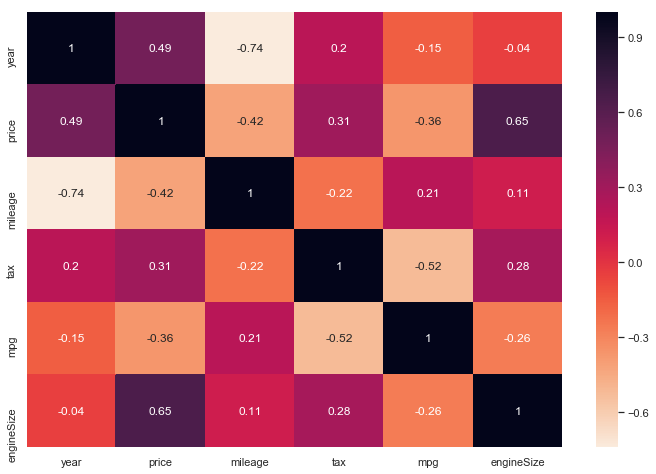

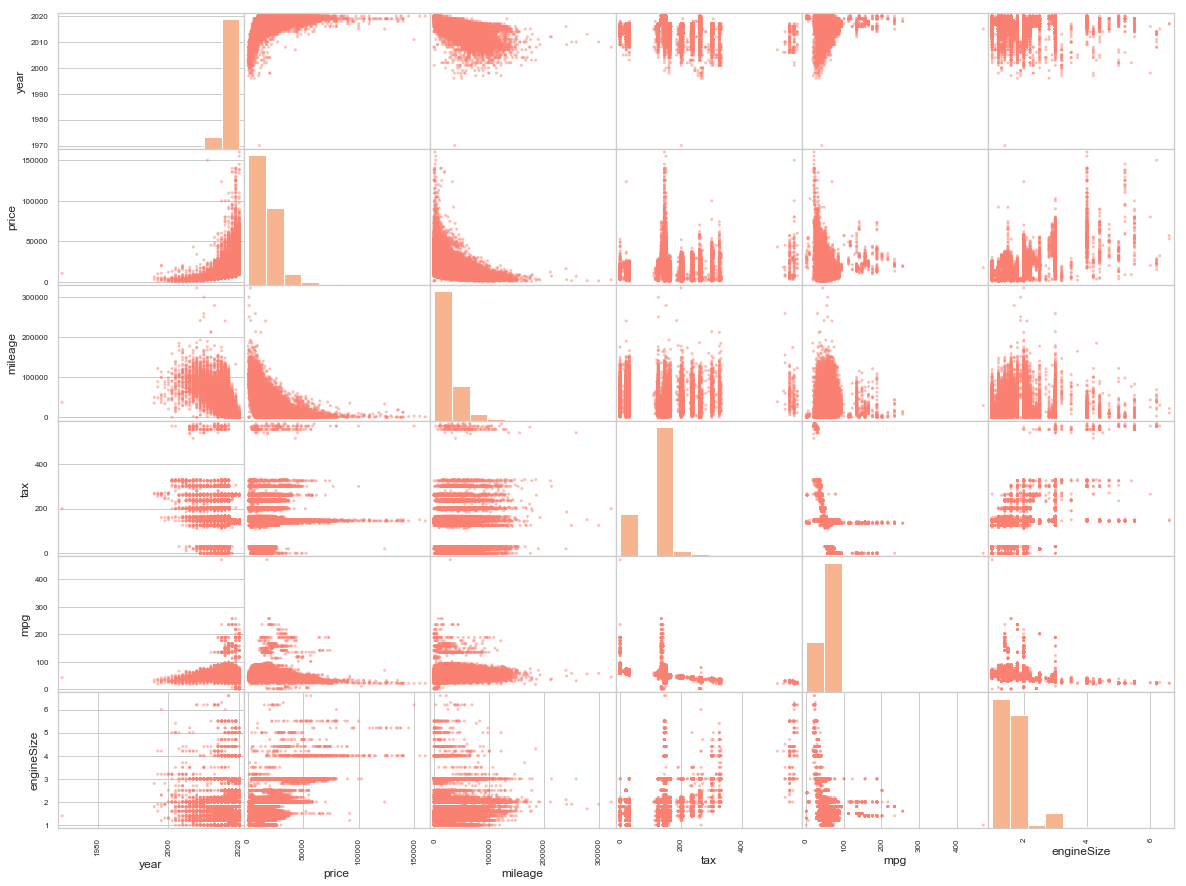

In [5]:
#Matrice di correlazione
from pandas.plotting import scatter_matrix
corrMat = df.corr().round(2)
sns.heatmap(data=corrMat, annot=True, cmap='rocket_r')
#Scatter matrix
attributes = ["year","price","mileage","tax","mpg","engineSize"]
scatter_matrix(df[attributes], figsize=(20, 15), color='salmon')
plt.show()

## 3 - Regressione lineare
E' quindi evidente una relazione tra le varie *features* $\underline{x}$ e il prezzo delle macchine usate y: considerando la branca dell'apprendimento automatico che va sotto il nome di **Supervised Learning** (SL), quando ho p variabili di *input* e il *label* in *output* associato, è possibile estrarre un modello, cioè una funzione, che riproduca le relazioni tra i dati. Questo modello può in seguito essere applicato a nuovi dati di input $\underline{x}$ per poter predire il loro output associato, cioè dato un nuovo set di caratteristiche relative a macchine usate, sarà possibile predire il loro prezzo di vendita. E' possibile fare ciò studiando il dataset con il metodo di **regressione lineare**. Supponiamo di aver p caratteristiche di input, ognuna di esse con n campionamenti; la regressione lineare cerca una relazione tra questi input e l'output y che può essere scritta come:
$$ y = f(\underline{x}) + \epsilon,$$
dove $\epsilon$ è un errore stocastico di tipo gaussiano con media nulla e una certa varianza $\mathcal{N}(0,\sigma^2)$. Il campione di dati di input può essere rappresentato tramite la **matrice di design X** di dimensione $n\times p$, in cui ogni riga rappresenta un campionamento dei p predittori; se alla matrice aggiungiamo una colonna di tutti 1 per riassorbire il bias $\epsilon$ otteniamo:
$$
\boldsymbol{X} = \begin{bmatrix} 1 & x_0^1 & x_0^2 & ... & x_0^{p-1} \\  
                                 1 & x_1^1 & x_1^2 & ... & x_1^{p-1} \\
                                 ... & & ... & & ... \\
                                 1 & x_i^1 & x_i^2 & ... & x_i^{p-1} \\
                                 ... & & ... & & ... \\
                                 1 & x_{n-1}^1 & x_{n-1}^2 & ... & x_{n-1}^{p-1} \\
                 \end{bmatrix} = \begin{bmatrix} \underline{x_0^T} \\ 
                                                 \underline{x_1^T} \\
                                                 ... \\
                                                 \underline{x_i^T} \\ 
                                                 ... \\
                                                 \underline{x_{n-1}^T} 
             \end{bmatrix}        
$$     
Posso assumere una relazione lineare tra i predittori e l'output, con un set di **parametri di regressione** $\boldsymbol{\vec{\beta}}=[\beta_{0},\beta_{1},\dots,\beta_{p-1}]^T$, vettore di dimensione p:
$$
\hat{\vec{y}} = X \vec{\beta}.
$$
$\hat{\vec{y}}$, vettore di n dimensioni per gli n campionamenti, rappresenta l'approssimazione dell'output fornita dal modello, date in input le p caratteristiche degli n campionamenti. Chiaramente ci serve una nozione di quanto bene il modello descriva i dati e ciò è fornito dalla **funzione di costo**. Una delle più comuni è quella chiamata *Ordinary Least Square*, cioè la deviazione quadratica media:
$$
C(\vec{\beta}) = \frac{1}{n}(\vec{y}-\hat{\vec{y}})^T(\vec{y}-\hat{\vec{y}}) = \frac{1}{n}(\vec{y}-X \vec{\beta})^T(\vec{y}-X \vec{\beta})
$$
Minimizzando la funzione di costo rispetto al vettore $\vec{\beta}$, cioè calcolandone il gradiente e ponendo ogni componente del gradiente = 0, si ottiene come soluzione (se il prodotto di matrici $X^TX$ è invertibile):
$$
\vec{\beta} = (X^T X)^{-1} X^T \vec{y}
$$
E' possibile fare tutto ciò in modo molto semplice usando la libreria [scikit-learn](https://scikit-learn.org/stable/), che presenta funzioni per fare la regressione lineare ([skl.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Prima di implementare la valutazione del modello di regressione lineare, una semplice modifica che si può fare è modificare la variabile di output da (price) a log(price): mentre la distribuzione del prezzo (primo istogramma di seguito) non è simmetrica, ha il massimo a valori bassi ~10000£, diminuisce in modo molto ripido da entrambi i lati, con una lunga coda verso valori più alti come visto già in precedenza, la distribuzione di log(price) è molto più simmetrica (istogramma a destra) e un andamento più simmetrico e un range più limitato spesso portano a performance migliori degli algoritmi di *Machine Learning*. I risultati nel seguito saranno valutati usando log(price), ma sarà anche riportato il valore ottenuto usando direttamente 'price', per vedere quanto una piccola modifica possa avere comunque un impatto importante. Gli step principali riportati di seguito sono:
- divisione del dataset in training e test set;
- *Standardization* delle *features* usando lo StandardScaler: ciò deve essere fatto separatamente su *training* e *test set* perchè, facendolo sul dataset completo, porterebbe a introdurre delle informazioni relative alla media e varianza di tutto il dataset su tutti i dati, compresi quelli che poi diventeranno test set, introducendo così un possibile bias;
- Regressione lineare usando '*price*' o *log(price)*;
- Regressione lineare con e senza variabili categoriche;
- Regressione lineare di tipo Ridge e Lasso;

Text(0.5, 1.0, 'Distribuzione della variabile target = log(price)')

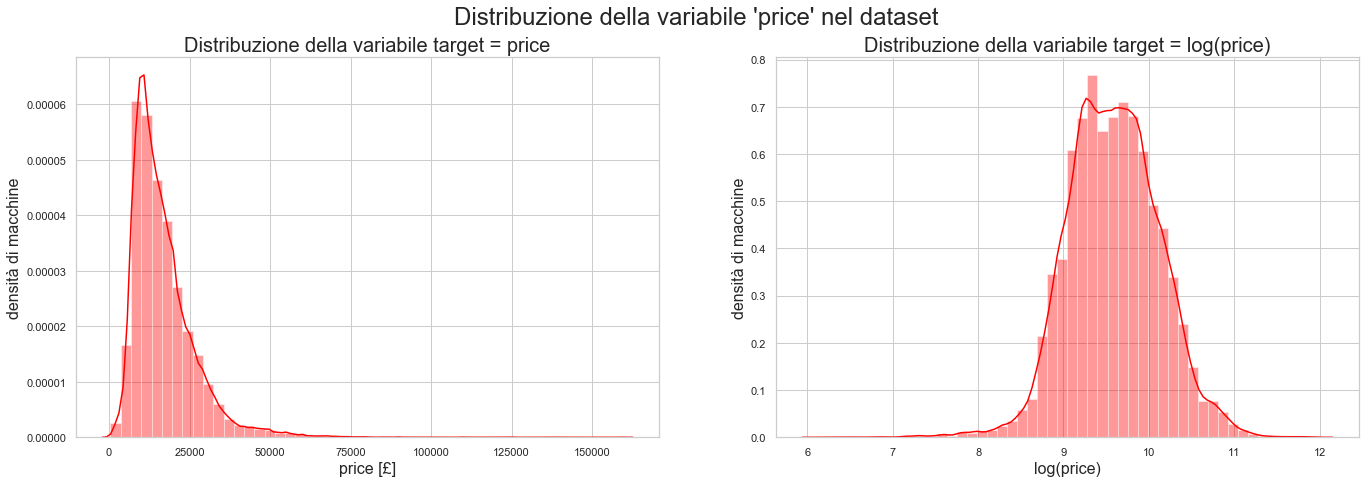

In [6]:
#Distribuzione della variabile 'price' nel dataset
fig = plt.figure(figsize=(23, 7))
fig.suptitle("Distribuzione della variabile 'price' nel dataset", fontsize = 24)

ax1 = plt.subplot(121)
ax1 = sns.distplot(df['price'], bins=50, color='red')
ax1.set_ylabel("densità di macchine",  fontsize=16)
ax1.set_xlabel("price [£]", fontsize=16)
ax1.set_title("Distribuzione della variabile target = price", fontsize=20)

ax2 = plt.subplot(122)
ax2 = sns.distplot(np.log(df['price']), bins=50, color='red')
ax2.set_ylabel("densità di macchine",  fontsize=16)
ax2.set_xlabel("log(price)", fontsize=16)
ax2.set_title("Distribuzione della variabile target = log(price)", fontsize=20)

### Divisione del data in training e test set, *standardization* delle *features* e regressione lineare usando (price) o log(price)
In questo paragrafo è implementato un semplice modello di regressione lineare (RL) usando solo le variabili numeriche nel dataset, cioè 'year', 'mileage', 'tax', 'mpg', 'engineSize'. Come primo passo il dataset viene diviso in training set (80%) e test set (20%). La RL è effettuata usando come variabile di output nel primo caso 'price' e nel secondo caso il suo log, log(price). Per valutare la bontà del modello ho usato come metrica la **variance score** o $R^2$ che ci dà una nozione di quanto i futuri campioni possono essere scritti bene dal modello valutato. La miglior *variance score* possibile è 1.0 e più diminuisce (può anche essere negativa), più il modello descrive peggio i dati. 

Se $\hat{y}_i$ è il valore predetto dell'i-esimo campione e $y_i$ è il valore vero corrispondente, la *variance score* $R^2$ è definita come

$$
R^2(\hat{y}, y) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$
dove $\bar{y}$ è i valore medio definito da $$ \bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.$$

Nel caso di y = 'price' si ottiene un $R^2 = 0.72$, mentre per y = log(price) $R^2 = 0.79$, cioè il modello migliora nettamente già semplicemente cambiando il range della variabile di output per renderlo più simmetrico. I grafici appena seguenti riportano per entrambi i modelli creati (cioè usando o price o log(price)) il confronto tra il valore del prezzo predetto dal modello e il valore del prezzo nel dataset di test, cioè il valore 'vero'. Un modello perfetto riprodurrebbe esattamente i valori veri del prezzo, cioè il grafico sarebbe rappresentato dalla bisettrice del primo quadrante, $y=x$. Come si può vedere, il modello che utilizza il log(price) riproduce molto meglio i valori veri, mentre il modello che utilizza direttamente 'price' ha problemi soprattutto nel range di prezzi molto bassi o molto alti, addirittura predicendo alcuni valori dei prezzi negativi. Nel seguito quindi sarà utilizzata come variabile di target principalmente log(price). 

Un'altra metrica usata per valutare la bontà del modello è il *Mean Absolute Error* (MAE), una metrica che corrisponde alla somma dei valori assoluti delle differenze tra il valore campionato $y_i$ e il valore predetto dal modello $\hat{y}_i$ (norma $l1$):
$$
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \hat{y}_i \right|.
$$
Dalla regressione, valutando il MAE su 19732 macchine, si ottiene MAE = 3552.69 e MAE = 3292.18 usando *price* e *log(price)* rispettivamente, il che significa che mediamente si ottiene un errore di circa 3000 £ sul prezzo stimato della macchina usata (chiaramente può essere sia sovrastimato che sottostimato), ma comunque anche da questa metrica risulta che il modello di RL che utilizza log(price) funziona meglio.

Controllo le dimensioni dei dataset di training e test:
(78927, 5)
(19732, 5)
(78927, 5)
(19732, 5)
Variance score usando y = price : R2 = 0.72
Variance score usando y = log(price): R2 = 0.79
Mean Absolute Error usando y = price : MAE = 3552.69
Mean Absolute Error usando y = log(price): MAE = 3292.18


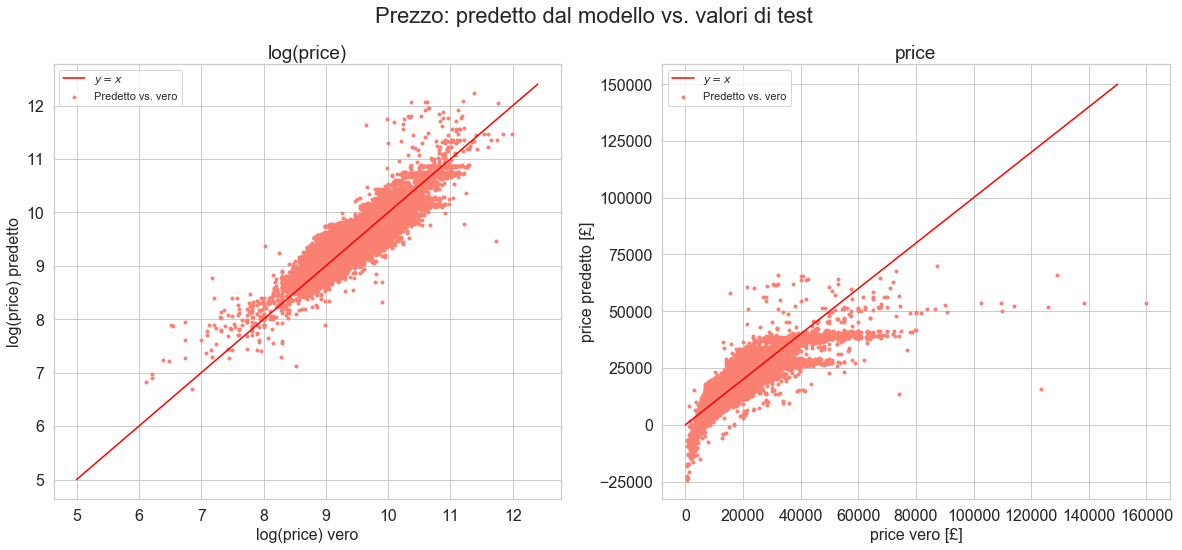

In [7]:
#Regressione lineare, come prima cosa si divide il dataset in training set e test set, in questo caso 80% e 20% del dataset iniziale rispettivamente.  
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']] 
Y1 = df['price'] 
Y2 = np.log(df['price'])
RS = 5
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1, test_size = 0.2, random_state=RS)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y2, test_size = 0.2, random_state=RS)

#Standardization delle input features
ct = ColumnTransformer([("year, mileage, tax, mpg, engineSize", StandardScaler(),[0, 1, 2, 3, 4])], remainder="passthrough") 

x_train1 = ct.fit_transform(X_train1)
df_scaled_train1 = pd.DataFrame(x_train1)
X_train1 = df_scaled_train1.rename(columns={0 : 'year', 1 : 'mileage', 2 : 'tax', 3 : 'mpg', 4 : 'engineSize'})
#display(df_scaled_train1)

x_train2 = ct.fit_transform(X_train2)
df_scaled_train2 = pd.DataFrame(x_train2)
X_train2 = df_scaled_train2.rename(columns={0 : 'year', 1 : 'mileage', 2 : 'tax', 3 : 'mpg', 4 : 'engineSize'})

x_test1 = ct.fit_transform(X_test1)
df_scaled_test1 = pd.DataFrame(x_test1)
X_test1  = df_scaled_test1.rename(columns={0 : 'year', 1 : 'mileage', 2 : 'tax', 3 : 'mpg', 4 : 'engineSize'})

x_test2 = ct.fit_transform(X_test2)
df_scaled_test2 = pd.DataFrame(x_test2)
X_test2  = df_scaled_test2.rename(columns={0 : 'year', 1 : 'mileage', 2 : 'tax', 3 : 'mpg', 4 : 'engineSize'})

print('Controllo le dimensioni dei dataset di training e test:')
print(X_train1.shape)
print(X_test1.shape)
print(X_train2.shape)
print(X_test2.shape)

Prezzi1 = Y_test1
Prezzi2 = Y_test2

#Fit del modello di regressione lineare usando price e log(price)
LR1 = skl.LinearRegression().fit(X_train1, Y_train1)
LR2 = skl.LinearRegression().fit(X_train2, Y_train2)
y_hat1 = LR1.predict(X_test1)
y_hat2 = LR2.predict(X_test2)

# Variance score: 1 è il massimo, che si otterrebbe nel caso di predizione perfetta, uguale all'output. Quindi più La variance score si avvicina a 1, più il modello lineare rappresenta bene i dati. 
# Calcolo anche il MAE

R2_price = r2_score(Prezzi1 , y_hat1)
R2_logprice = r2_score(Prezzi2 , y_hat2)
print('Variance score usando y = price : R2 = %.2f' % R2_price)
print('Variance score usando y = log(price): R2 = %.2f' % R2_logprice)
print('Mean Absolute Error usando y = price : MAE = %.2f' % mean_absolute_error(Prezzi1 , y_hat1))

Prezzi2 = pd.DataFrame(Prezzi2)
Prezzi2 = Prezzi2.rename(columns={0 : 'price'})
Prezzi2 = np.exp(Prezzi2['price'])
#display(Prezzi2)

y_hat2 = pd.DataFrame(y_hat2)
y_hat2 = y_hat2.rename(columns={0 : 'price'})
y_hat2 = np.exp(y_hat2['price'])
#display(y_hat2)

print('Mean Absolute Error usando y = log(price): MAE = %.2f' % mean_absolute_error(Prezzi2 , y_hat2))
#print(LR1.coef_, LR1.intercept_)
#print(LR2.coef_, LR2.intercept_)

#Plot di y_test vs y_pred in entrambi i casi di y = price, y = log(price)
fs = 16
best_i = 0
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Prezzo: predetto dal modello vs. valori di test", fontsize=22)

r_test_p2 = []
r_test_p2.append(LR2.predict(X_test2))

ax[0].scatter(Y_test2, r_test_p2[best_i], label='Predetto vs. vero', color='salmon', marker='.')
ax[0].plot(np.arange(5, 12.5, 0.1), np.arange(5, 12.5, 0.1), color='red', label=r'$y= x$')

ax[0].set_title("log(price)", fontsize=19)
ax[0].set_xlabel("log(price) vero", fontsize=fs)
ax[0].set_ylabel("log(price) predetto", fontsize=fs)

ax[0].tick_params(labelsize=fs)
ax[0].legend()

r_test_p1 = []
r_test_p1.append(LR1.predict(X_test1))
ax[1].scatter(Y_test1, r_test_p1[best_i], label='Predetto vs. vero', color='salmon',  marker='.')
ax[1].plot(np.arange(0, 150000), np.arange(0, 150000), color='red', label=r'$y= x$')

ax[1].set_title("price", fontsize=19)
ax[1].set_xlabel("price vero [£]", fontsize=fs)
ax[1].set_ylabel("price predetto [£]", fontsize=fs)

ax[1].tick_params(labelsize=fs)
ax[1].legend()

plt.show()

### Regressione lineare con le variabili categoriche
In seguito si è posto il problema di come utilizzare le varabili categoriche presenti nel dataset: **'carManufacturer', 'transmission', 'fuelType'**. Per fare ciò esistono delle classi molto utili in scikit-learn: [*LabelEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) e [*OneHotEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):
- *LabelEncoder* trasforma dati categorici in numerici. In particolare ad esempio considerando la variabile categorica 'transmission', ciò che viene fatto dal codice è assegnare a *Automatic* = 0, *Manual* = 1 e *Semi-Auto* = 2. In generale non basta questo passo per poter utilizzare la variabile: se inserissimo la caratteristica 'transmission' nel modello con questi valori, il modello interpreterebbe i dati con l'ordine numerico, cioè considerando 0<1<2, ma non è detto che questa relazione matematica rappresenti correttamente la relazione prezzo-caratteristica che ci si può aspettare dalla realtà;
- Per risolvere il problema introdotto da *LabelEncoder* si utilizza *OneHotEncoder*. Ciò che viene fatto dal codice è dividere la singola variabile categorica (1 colonna) in tante colonne quanti sono i valori che può assumere: nel caso di 'transmission' si otterranno 3 colonne, una per 'Automatic', una per 'Manual', una per 'Semi-Auto'. Queste 3 colonne sono riempite solamente da 0 e 1, in base a quale colonna rappresenta veramente il valore assunto dalla macchina. Considerando la prima macchina del DataFrame, essa ha 'transmission' = 'Manual': la colonna 'Automatic' avrà valore 0, 'Manual' = 1, 'Semi-Auto' = 0. In questo modo trasformo una variabile categorica in tante variabili numeriche che possono assumere solo valori 0 e 1 e chiaramente correlate tra loro (quando la macchina ha cambio automatico, non potrà averlo manuale e viceversa).

Per altre informazioni sul loro utilizzo è possibile consultare il testo "Hands-on Machine Learing with Scikit-Learn, Keras & Tensorflow."* di Aurélien Géron (2).
Ho eseguito quindi questa procedura per le 3 variabili categoriche e ho poi ricalcolato la matrice di correlazione che adesso presenta 22 variabili: la sottomatrice $6 \times 6$ in basso a destra è quella trovata precedentemente con le sole variabili numeriche. Ho valutato quindi il modello di RL usando tutte le nuove variabili: la *variance score* aumenta sensibilmente, passando da $R^2 = 0.79$ a $R^2 = 0.89$ e anche la distribuzione di log(price) vero vs. predetto migliora sensibilmente, con molta meno dispersione nel primo quadrante e molti dati più concentrati sulla bisettrice. Aggiungere al modello le variabili categoriche aumenta quindi sensibilmente le performance del modello. Questo miglioramento viene anche indicato dalla importante riduzione del MAE che passa da **MAE** $= 3292.18$ considerando solo le 5 variabili numeriche a **MAE** $= 2340.70$ usando tutte le 21 variabili numeriche e categoriche, cioè le previsioni del modello migliorano in media di circa 1000£! 


- DataFrame dopo LabelEncoding:



,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carManufacturer
0,2017,12500,1,15735,3,150,55.4,1.4,0
1,2016,16500,0,36203,0,20,64.2,2.0,0
2,2016,11000,1,29946,3,30,55.4,1.4,0
3,2017,16800,0,25952,0,145,67.3,2.0,0
4,2019,17300,1,1998,3,145,49.6,1.0,0
5,2016,13900,0,32260,3,30,58.9,1.4,0
6,2016,13250,0,76788,0,30,61.4,2.0,0
7,2016,11750,1,75185,0,20,70.6,2.0,0
8,2015,10200,1,46112,3,20,60.1,1.4,0
9,2016,12000,1,22451,3,30,55.4,1.4,0



- DataFrame dopo OneHotEncoding:



,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Petrol,Audi,BMW,Ford,...,Skoda,Toyota,Vauxhall,Volkswagen,year,price,mileage,tax,mpg,engineSize
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2017.0,12500.0,15735.0,150.0,55.4,1.4
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,16500.0,36203.0,20.0,64.2,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,11000.0,29946.0,30.0,55.4,1.4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2017.0,16800.0,25952.0,145.0,67.3,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019.0,17300.0,1998.0,145.0,49.6,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,13900.0,32260.0,30.0,58.9,1.4
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,13250.0,76788.0,30.0,61.4,2.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,11750.0,75185.0,20.0,70.6,2.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2015.0,10200.0,46112.0,20.0,60.1,1.4
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016.0,12000.0,22451.0,30.0,55.4,1.4


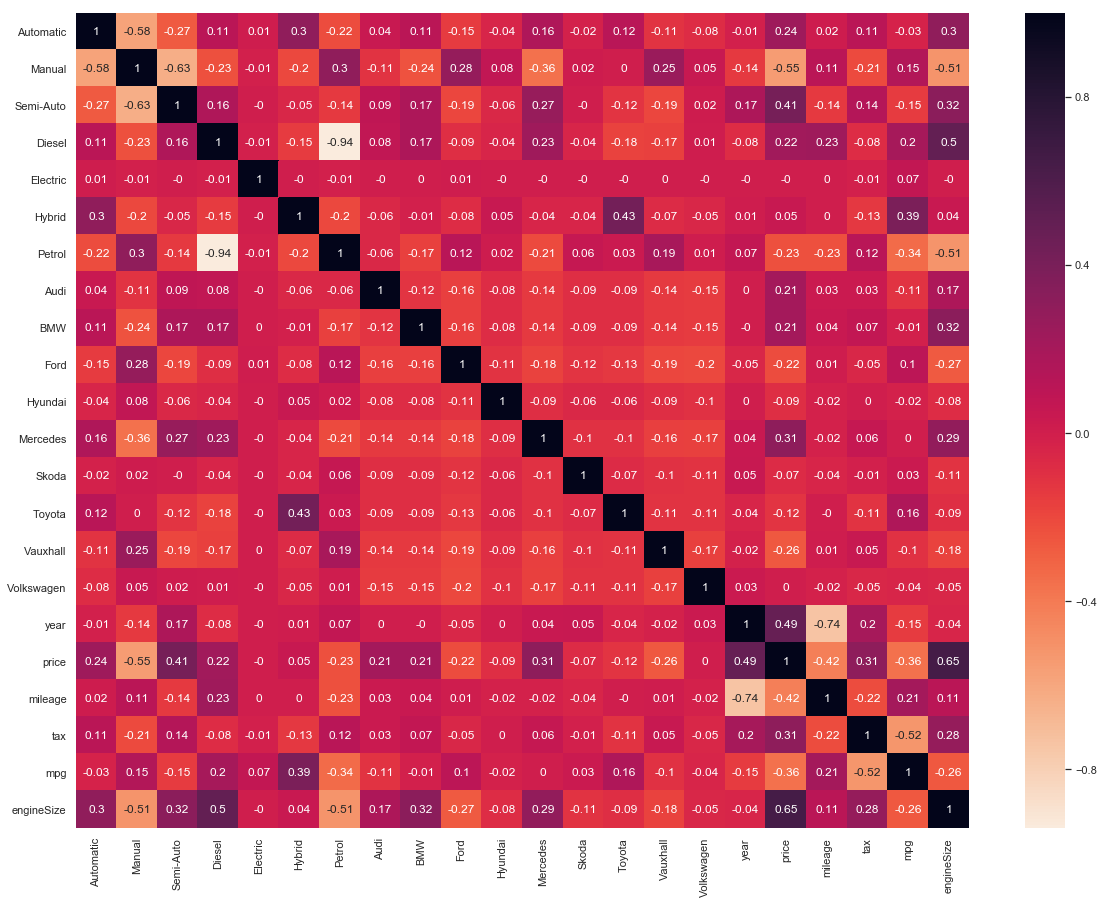

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib
import os
categorical_features = ['carManufacturer','transmission', 'fuelType']
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

df_new = df.copy()
path = 'LabelEncoder'
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    #creo cartella per salvare i modelli di label encoding
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    #label encoding
    le.fit(df_new[feature])
    #print(feature)
    
    #Salva l'encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    #Trasformo i dati
    df_new[feature] = le.transform(df_new[feature])
    #get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

df_new.drop(columns=['model'], inplace=True)
print('\n- DataFrame dopo LabelEncoding:\n')
display(df_new)

#OneHotEncoding
ct = ColumnTransformer([("transmission, fuelType, carManufacturer", OneHotEncoder(),[2, 4, 8])], remainder="passthrough") 
x = ct.fit_transform(df_new)
df_AllVar = pd.DataFrame(x)
df_AllVar = df_AllVar.rename(columns={0 : 'Automatic', 1 : 'Manual', 2 : 'Semi-Auto', 3 : 'Diesel', 4 : 'Electric', 5 : 'Hybrid', 6 : 'Petrol', 7 : 'Audi', 8 : 'BMW', 9 : 'Ford', 10 : 'Hyundai', 11 : 'Mercedes', 12 : 'Skoda', 13 : 'Toyota', 14 : 'Vauxhall', 15 : 'Volkswagen', 16 : 'year', 17 : 'price', 18 : 'mileage', 19 : 'tax', 20 : 'mpg', 21 : 'engineSize'})
print('\n- DataFrame dopo OneHotEncoding:\n')
display(df_AllVar)

#Nuova matrice di correlazione
corrMat2 = df_AllVar.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=corrMat2, annot=True, cmap='rocket_r')
plt.show()

Controllo le dimensioni dei dataset di training e test:
(78927, 21)
(19732, 21)
(78927,)
(19732,)
Variance score usando y = log(price) e solo variabili numeriche : 0.79
Variance score usando y = log(price), usando sia var. categoriche che numeriche: 0.89
Mean Absolute Error usando y = log(price) e solo variabili numeriche : MAE = 3292.18
Mean Absolute Error usando y = log(price), usando sia var. categoriche che numeriche: MAE = 2340.70


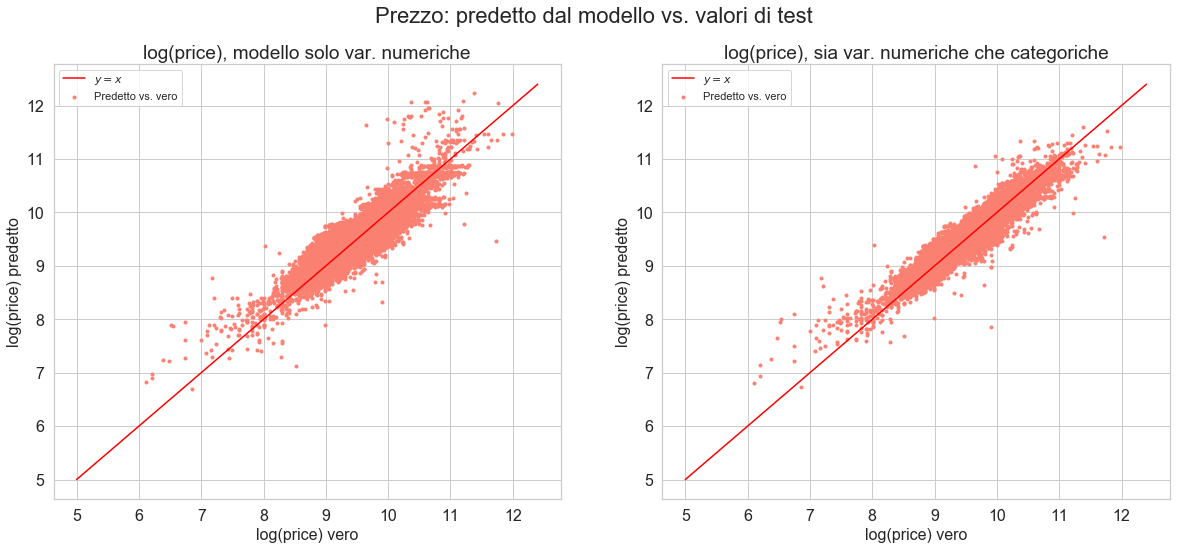

In [9]:
X = df_AllVar[['Automatic','Manual','Semi-Auto', 'Diesel','Electric','Hybrid','Petrol', 'Audi', 'BMW', 'Ford', 'Hyundai','Mercedes', 'Skoda','Toyota', 'Vauxhall','Volkswagen','year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y = np.log(df_AllVar['price'])
RS = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=RS)

print('Controllo le dimensioni dei dataset di training e test:')
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Prezzi = Y_test

LR = skl.LinearRegression().fit(X_train, Y_train)
y_hat = LR.predict(X_test)

# Variance score: 1 è il massimo, che si otterrebbe nel caso di predizione perfetta, uguale all'output. Quindi più La variance score si avvicina a 1, più il modello lineare rappresenta bene i dati.
#Calcolo anche MAE

print('Variance score usando y = log(price) e solo variabili numeriche : %.2f' % R2_logprice) 
print('Variance score usando y = log(price), usando sia var. categoriche che numeriche: %.2f' % r2_score(Prezzi , y_hat))
print('Mean Absolute Error usando y = log(price) e solo variabili numeriche : MAE = %.2f' % mean_absolute_error(Prezzi2 , y_hat2))

Prezzi = pd.DataFrame(Prezzi)
Prezzi = Prezzi.rename(columns={0 : 'price'})
Prezzi = np.exp(Prezzi['price'])
#display(Prezzi)

y_hat = pd.DataFrame(y_hat)
y_hat = y_hat.rename(columns={0 : 'price'})
y_hat = np.exp(y_hat['price'])
#display(y_hat)

print('Mean Absolute Error usando y = log(price), usando sia var. categoriche che numeriche: MAE = %.2f' % mean_absolute_error(Prezzi, y_hat))

#print(LR.coef_, LR.intercept_)

#Plot di y_test vs y_pred in entrambi i casi di y = log(price) con 1) solo var. numeriche, 2) sia var. numeriche che categoriche
fs = 16
best_i = 0
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Prezzo: predetto dal modello vs. valori di test", fontsize=22)

ax[0].scatter(Y_test2, r_test_p2[best_i], label='Predetto vs. vero', color='salmon', marker='.')
ax[0].plot(np.arange(5, 12.5,0.1), np.arange(5, 12.5,0.1), color='red', label=r'$y= x$')

ax[0].set_title("log(price), modello solo var. numeriche", fontsize=19)
ax[0].set_xlabel("log(price) vero", fontsize=fs)
ax[0].set_ylabel("log(price) predetto", fontsize=fs)

ax[0].tick_params(labelsize=fs)
ax[0].legend()

r_test_p = []
r_test_p.append(LR.predict(X_test))
ax[1].scatter(Y_test, r_test_p[best_i], label='Predetto vs. vero', color='salmon',  marker='.')
ax[1].plot(np.arange(5, 12.5, 0.1), np.arange(5,12.5,0.1), color='red', label=r'$y= x$')

ax[1].set_title("log(price), sia var. numeriche che categoriche", fontsize=19)
ax[1].set_xlabel("log(price) vero", fontsize=fs)
ax[1].set_ylabel("log(price) predetto", fontsize=fs)

ax[1].tick_params(labelsize=fs)
ax[1].legend()

plt.show()

### Ridge e Lasso
In alcuni casi può essere conveniente usare i metodi di regressione di tipo Ridge o Lasso: essi sono metodi di regolarizzazione o *shrinkage* che permettono di ridurre i gradi di libertà effettivi del sistema. Essi si rendono necessari in alcuni casi in presenza di dataset molto grandi (come nel nostro caso, la matrice di design dopo aver aggiunto le variabili categoriche ha dimensione $n \times p \sim 100000 \times 21$), matrici non invertibili o in caso di correlazioni molto grandi nel dataset. Essi consistono nell'aggiungere un termine di regolarizzazione alla funzione di costo degli OLS = *Ordinary Least Squares*:
- **Ridge**: $C(X,\vec{\beta}) = \frac{1}{n}(\vec{y}-X \vec{\beta})^T(\vec{y}-X \vec{\beta}) + \lambda \vec{\beta^T} \vec{\beta}$. Minimizzando la funzione di costo rispetto ai $\vec{\beta}$, si trova come soluzione analitica $\vec{\beta}_{Ridge} = (X^T X + \lambda I)^{-1}X^T \vec{y}$. Nel Ridge ciò che accade è una riduzione delle varie componenti proporzionale alla loro varianza: vengono ridotte maggiormente le direzioni meno importanti con varianza minore, in cui si ha quindi esplorato in modo minore lo spazio dei parametri e in cui si hanno meno informazioni.
- **Lasso**: $C(X,\vec{\beta}) = \frac{1}{n}(\vec{y}-X \vec{\beta})^T(\vec{y}-X \vec{\beta}) + \lambda \sum_{j=0}^{p-1} |\beta_j|$. In questo caso non si ha una soluzione analitica come per il Ridge, ma si ha una riduzione e alcuni parametri vengono messi a 0. 

Come si può vedere dai risultati, il metodo di Ridge è stabile per ogni valore del parametro di *shrinkage* $\lambda$, mentre il LASSO peggiora nettamente all'aumentare di $\lambda$.
Tuttavia anche il metodo di Ridge non dà miglioramenti rispetto alla regressione lineare valutata nel paragrafo precedente, con tutti i parametri considerati, sia numerici che categorici. 

In [11]:
from sklearn.linear_model import Ridge, Lasso

lambdas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

r_train, r_test = [], []
l_train, l_test = [], []
r_test_p, l_test_p = [], []

l_values  = "Lambdas|       |"
ridge_res = " Ridge | Train |"
ridge_tes = "  R2   | Test  |" 
lasso_res = " LASSO | Train |"
lasso_tes = "  R2   | Test  |" 

for i,l in enumerate(lambdas):
    
    ri = Ridge(alpha=l).fit(X_train, Y_train)
    la = Lasso(alpha=l).fit(X_train, Y_train)
    
    #TRAIN
    y_r_p = ri.predict(X_train)
    y_l_p = la.predict(X_train)

    r_train.append(r2_score(Y_train, y_r_p))
    l_train.append(r2_score(Y_train, y_l_p))
    ridge_res +="{:.3f}|".format(r_train[i])
    lasso_res +="{:.3f}|".format(l_train[i])
    
    #TEST
    r_test_p.append(ri.predict(X_test))
    l_test_p.append(la.predict(X_test))

    r_test.append(r2_score(Y_test, r_test_p[i]))
    l_test.append(r2_score(Y_test, l_test_p[i]))
    ridge_tes +="{:.3f}|".format(r_test[i])
    lasso_tes +="{:.3f}|".format(l_test[i])
    
    l_values += " {:.2f}|".format(l)
    
print(l_values)
print("----------------------------------------------------------------------------")
print(ridge_res)
print(ridge_tes)
print("----------------------------------------------------------------------------")
print(lasso_res)
print(lasso_tes)

C:\Users\lau97\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82913e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Lambdas|       | 0.00| 0.01| 0.10| 0.20| 0.30| 0.40| 0.50| 0.60| 0.70| 0.80| 0.90| 1.00|
----------------------------------------------------------------------------
 Ridge | Train |0.886|0.886|0.886|0.886|0.886|0.886|0.886|0.886|0.886|0.886|0.886|0.886|
  R2   | Test  |0.887|0.887|0.887|0.887|0.887|0.887|0.887|0.887|0.887|0.887|0.887|0.887|
----------------------------------------------------------------------------
 LASSO | Train |0.885|0.857|0.644|0.382|0.318|0.316|0.314|0.312|0.309|0.309|0.309|0.309|
  R2   | Test  |0.886|0.860|0.648|0.387|0.325|0.323|0.321|0.318|0.315|0.315|0.315|0.315|


## 4 - Regressione con Alberi Decisionali
Gli Alberi Decisionali sono un altro importante strumento utilizzato in *Machine Learning*, usati sia come metodo di classificazione che di regressione. Sono algoritmi basati su una sequenza di **nodi** decisionali che ad ogni step dividono lo spazio delle caratteristiche in due, fino a suddividerlo in tanti rettangoli (nodi finali) detti **petali** o **foglie**, ognuno con un relativo valore di output (nella regressione) o con una certa classe di appartenenza (nella classificazione). La divisione a ogni nodo viene effettuata scegliendo il valore ottimale di separazione $s$ in cui *splittare*, cioè dividere, una certa variabile di input $x_i$ e questa scelta viene fatta cercando di minimizzare una funzione di costo, ad esempio nella regressione si può usare quella ai minimi quadrati:
$$
C(X,s) = \frac{1}{n} \sum_i^n[y_i - f(x_i)]^2
$$
Una volta scelti i *boundaries* tra le varie M regioni scelte $R_M$, il valore di $f(x_i)$ con $x_i \in R_m$ sarà 
$$
f(x_i) = \hat{c}_m = \frac{\sum_{i \in R_m}y_i}{\sum_{i \in R_m}} = <y_i>_{x_i \in R_m}
$$
cioè la media dei valori della variabile di output ottenuta da tutti i punti che si trovano all'interno della regione $R_m$. Quindi ciò che viene fatto dall'algoritmo è considerare una variabile $x_i$ di input alla volta e vari possibili valori di separazione $s$ in quella variabile e vedere quale scelta $(x_i,s)$ minimizza la funzione di costo $C(X,s)$. In questo modo ottengo una funzione a gradini ma se sono presenti abbastanza nodi e quindi petali finali, la funzione riesce a descrivere bene anche funzioni continue. 
Quando si utilizza un Albero Decisionale è importante decidere in modo corretto alcuni parametri per evitare di andare in *overfitting* o di incorrere in altri problemi:
- attraverso il parametro `min_samples_leaf` si introduce il minimo numero campioni che una foglia finale deve avere. Ciò è molto importante soprattutto nei problemi di regressione perché permette di rendere più *smooth* il modello rispetto a quando si utilizza come parametro *max_depth*, cioè la massima profondità dell'albero data dal numero di livelli successivi in cui vengono fatte le divisioni binarie;
- il parametro `criterion` indica la funzione da utilizzare come *loss function* per decidere la qualità di una possibile divisione in una variabile $x_i$. I più usati sono *squared_error* cioè *mean squared error*, *absolute_error* per il *mean absolute error*;
- un altro parametro chiamato `ccp_alpha` serve per *tunare* al meglio la tecnica detta *pruning*, in italiano potatura, che consiste nel cercare di eliminare foglie ridondanti che non contribuiscono in modo significativo alla minimizzazione della funzione di costo da un albero $T_0$ iniziale senza restrizioni, per arrivare a un albero T con meno foglie. E' una tecnica importante per evitare di andare in *overfitting*; si definisce una nuova funzione di costo estesa 
$$
C_{\alpha}(T) = C(T) + \alpha|T|
$$
in cui alla funzione di costo dell'albero T viene sommato un termine di regolarizzazione dato dal prodotto del *parametro di complessità* $\alpha$ e del numero di foglie dell'albero |T|. Il parametro $\alpha \geq 0$ calibra il livello di potatura: se $\alpha \rightarrow 0 $ allora $T_{\alpha} \rightarrow T_0$, cioè nella funzione di costo non costa molto avere tanti nodi e quindi l'albero non viene potato, o vengono eliminati pochi nodi se $\alpha$ è piccolo. Viceversa se $\alpha \rightarrow \infty$, avere tanti nodi costa molto e di conseguenza l'albero viene potato fino al limite di ottenere un unico petalo finale.

Per capire l'impatto dei parametri ho trainato diversi Alberi Decisionali con diversi possibili valori di `min_samples_leaf` e `ccp_alpha` (implementando quindi una *grid search* per trovare i parametri più promettenti), in tre diversi casi, cioè considerando prima solo le variabili numeriche *'engineSize', 'year', 'mileage', 'mpg', 'tax'*, poi tutte le variabili sia numeriche che categoriche (ottenute dalla procedura di OneHotEncoding) insieme e infinite tutte le variabili insieme considerando log(price), per poter cofrontare questi risultati con quelli ottenuti precedentemente dal modello di regressione lineare. 

In [16]:
#Uso solo le variabili numeriche
X1 = df_AllVar[['engineSize', 'year', 'mileage', 'mpg', 'tax']]
Y1 = df_AllVar['price']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=RS)
Prezzi1 = Y1_test

#Uso tutte le variabili, sia numeriche che categoriche 
X2 = df_AllVar[['Automatic','Manual','Semi-Auto', 'Diesel','Electric','Hybrid','Petrol', 'Audi', 'BMW', 'Ford', 'Hyundai','Mercedes', 'Skoda','Toyota', 'Vauxhall','Volkswagen','year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y2 = df_AllVar['price'] 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=RS)
Prezzi2 = Y2_test

X3 = df_AllVar[['Automatic','Manual','Semi-Auto', 'Diesel','Electric','Hybrid','Petrol', 'Audi', 'BMW', 'Ford', 'Hyundai','Mercedes', 'Skoda','Toyota', 'Vauxhall','Volkswagen','year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y3 = np.log(df_AllVar['price'])
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state=RS)
Prezzi3 = Y3_test
Prezzi3 = pd.DataFrame(Prezzi3)
Prezzi3 = Prezzi3.rename(columns={0 : 'price'})
Prezzi3 = np.exp(Prezzi3['price'])

In [19]:
from sklearn.tree import DecisionTreeRegressor

#parametri
RS2 = 2
ccps = [0.0, 0.001, 0.01, 0.1, 0.5, 1.0]
min_leafs = [3, 5, 7, 10, 12, 15, 20, 25, 30]

r2_train_dt_1 = np.zeros((len(ccps), len(min_leafs)))
r2_test_dt_1 = np.zeros((len(ccps), len(min_leafs)))

r2_train_dt_2 = np.zeros((len(ccps), len(min_leafs)))
r2_test_dt_2 = np.zeros((len(ccps), len(min_leafs)))

r2_train_dt_3 = np.zeros((len(ccps), len(min_leafs)))
r2_test_dt_3 = np.zeros((len(ccps), len(min_leafs)))

best_score_1 = 0.0
best_score_2 = 0.0
best_score_3 = 0.0

MAE1 = 0.0
MAE2 = 0.0
MAE3 = 0.0

for i,c in enumerate(ccps):
    for j,l in enumerate(min_leafs):
        dt1 = DecisionTreeRegressor(min_samples_leaf=l, criterion='squared_error', random_state=RS2, ccp_alpha=c)
        dt2 = DecisionTreeRegressor(min_samples_leaf=l, criterion='squared_error', random_state=RS2, ccp_alpha=c)
        dt3 = DecisionTreeRegressor(min_samples_leaf=l, criterion='squared_error', random_state=RS2, ccp_alpha=c)
        dt1.fit(X1_train, Y1_train)
        dt2.fit(X2_train, Y2_train)
        dt3.fit(X3_train, Y3_train)
        # TRAIN (score è R2)
        r2_train_dt_1[i,j] = dt1.score(X1_train, Y1_train)
        r2_train_dt_2[i,j] = dt2.score(X2_train, Y2_train)
        r2_train_dt_3[i,j] = dt3.score(X3_train, Y3_train)
        # TEST
        r2_test_dt_1[i,j] = dt1.score(X1_test, Y1_test)
        r2_test_dt_2[i,j] = dt2.score(X2_test, Y2_test)
        r2_test_dt_3[i,j] = dt3.score(X3_test, Y3_test)
        
        if r2_test_dt_1[i,j] > best_score_1:
            y_test_p_dt_1 = dt1.predict(X1_test)
            best_c1, best_l1, best_score_1, MAE1 = c, l, r2_test_dt_1[i,j], mean_absolute_error(Prezzi1, y_test_p_dt_1)
        if r2_test_dt_2[i,j] > best_score_2:
            y_test_p_dt_2 = dt2.predict(X2_test)
            best_c2, best_l2, best_score_2, MAE2 = c, l, r2_test_dt_2[i,j], mean_absolute_error(Prezzi2, y_test_p_dt_2)
        if r2_test_dt_3[i,j] > best_score_3:
            y_test_p_dt_3 = dt3.predict(X3_test)
            y_hat = pd.DataFrame(y_test_p_dt_3)
            y_hat = y_hat.rename(columns={0 : 'price'})
            y_hat = np.exp(y_hat['price'])
            best_c3, best_l3, best_score_3, MAE3 = c, l, r2_test_dt_3[i,j], mean_absolute_error(Prezzi3, y_hat)
            
print("- Solo variabili numeriche:")            
print("cpp_alpha = \t{}".format(best_c1))
print("min_leaf = \t{}".format(best_l1))
print("R2 test score = {:.4f}".format(best_score_1))
print('Mean Absolute Error : MAE = %.2f' % MAE1)
print("- Sia variabili numeriche che categoriche:")  
print("cpp_alpha = \t{}".format(best_c2))
print("min_leaf = \t{}".format(best_l2))
print("R2 test score = {:.4f}".format(best_score_2))
print('Mean Absolute Error : MAE = %.2f' % MAE2)
print("- Sia variabili numeriche che categoriche usando log(price):")  
print("cpp_alpha = \t{}".format(best_c3))
print("min_leaf = \t{}".format(best_l3))
print("R2 test score = {:.4f}".format(best_score_3))
print('Mean Absolute Error : MAE = %.2f' % MAE3)

- Solo variabili numeriche:
cpp_alpha = 	0.0
min_leaf = 	25
R2 test score = 0.8723
Mean Absolute Error : MAE = 2196.17
- Sia variabili numeriche che categoriche:
cpp_alpha = 	1.0
min_leaf = 	5
R2 test score = 0.9264
Mean Absolute Error : MAE = 1495.73
- Sia variabili numeriche che categoriche usando log(price):
cpp_alpha = 	0.0
min_leaf = 	7
R2 test score = 0.9434
Mean Absolute Error : MAE = 1457.88


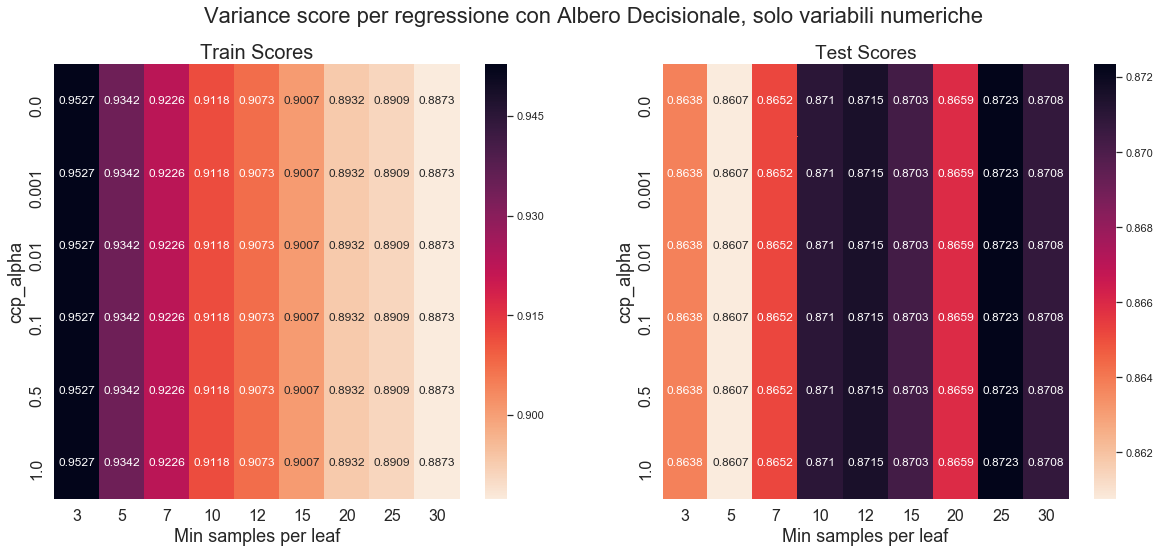

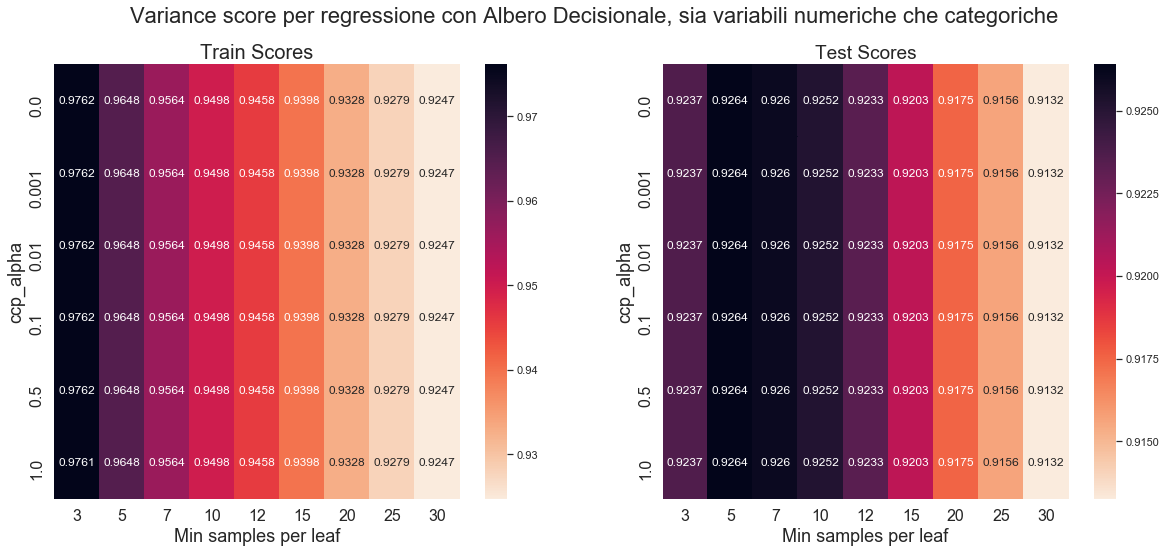

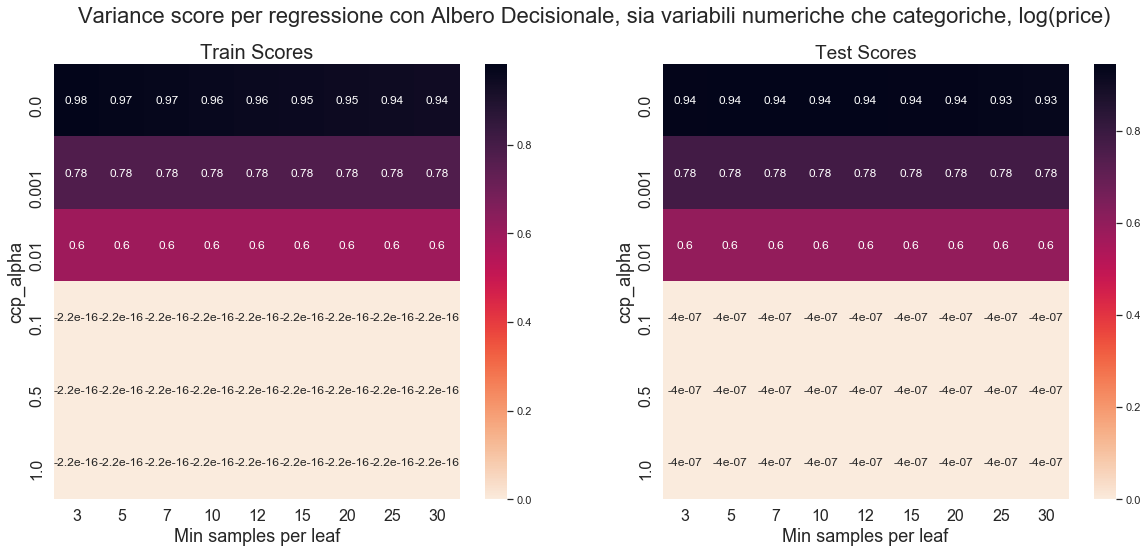

In [25]:
fs = 18
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Variance score per regressione con Albero Decisionale, solo variabili numeriche", fontsize=fs+4)

ax[0] = sns.heatmap(r2_train_dt_1, annot=True, ax=ax[0], xticklabels = min_leafs, yticklabels=ccps, fmt='.4', cmap='rocket_r')

ax[0].set_title("Train Scores", fontsize=fs+2)
ax[0].set_xlabel("Min samples per leaf", fontsize=fs)
ax[0].set_ylabel("ccp_alpha", fontsize=fs)

ax[0].tick_params(labelsize=fs-2)

ax[1] = sns.heatmap(r2_test_dt_1, annot=True, ax=ax[1], xticklabels = min_leafs, yticklabels=ccps, fmt='.4', cmap='rocket_r')

ax[1].set_title("Test Scores", fontsize=19)
ax[1].set_xlabel("Min samples per leaf", fontsize=fs)
ax[1].set_ylabel("ccp_alpha", fontsize=fs)

ax[1].tick_params(labelsize=fs-2)

plt.show()

fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Variance score per regressione con Albero Decisionale, sia variabili numeriche che categoriche", fontsize=fs+4)

ax[0] = sns.heatmap(r2_train_dt_2, annot=True, ax=ax[0], xticklabels = min_leafs, yticklabels=ccps, fmt='.4', cmap='rocket_r')

ax[0].set_title("Train Scores", fontsize=fs+2)
ax[0].set_xlabel("Min samples per leaf", fontsize=fs)
ax[0].set_ylabel("ccp_alpha", fontsize=fs)

ax[0].tick_params(labelsize=fs-2)

ax[1] = sns.heatmap(r2_test_dt_2, annot=True, ax=ax[1], xticklabels = min_leafs, yticklabels=ccps, fmt='.4', cmap='rocket_r')

ax[1].set_title("Test Scores", fontsize=19)
ax[1].set_xlabel("Min samples per leaf", fontsize=fs)
ax[1].set_ylabel("ccp_alpha", fontsize=fs)

ax[1].tick_params(labelsize=fs-2)

plt.show()

ccps3 = [0.1, 0.5, 1.0]

fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Variance score per regressione con Albero Decisionale, sia variabili numeriche che categoriche, log(price)", fontsize=fs+4)

ax[0] = sns.heatmap(r2_train_dt_3, annot=True, ax=ax[0], xticklabels = min_leafs, yticklabels=ccps, fmt='.2', cmap='rocket_r')

ax[0].set_title("Train Scores", fontsize=fs+2)
ax[0].set_xlabel("Min samples per leaf", fontsize=fs)
ax[0].set_ylabel("ccp_alpha", fontsize=fs)

ax[0].tick_params(labelsize=fs-2)

ax[1] = sns.heatmap(r2_test_dt_3, annot=True, ax=ax[1], xticklabels = min_leafs, yticklabels=ccps, fmt='.2', cmap='rocket_r')

ax[1].set_title("Test Scores", fontsize=19)
ax[1].set_xlabel("Min samples per leaf", fontsize=fs)
ax[1].set_ylabel("ccp_alpha", fontsize=fs)

ax[1].tick_params(labelsize=fs-2)

plt.show()

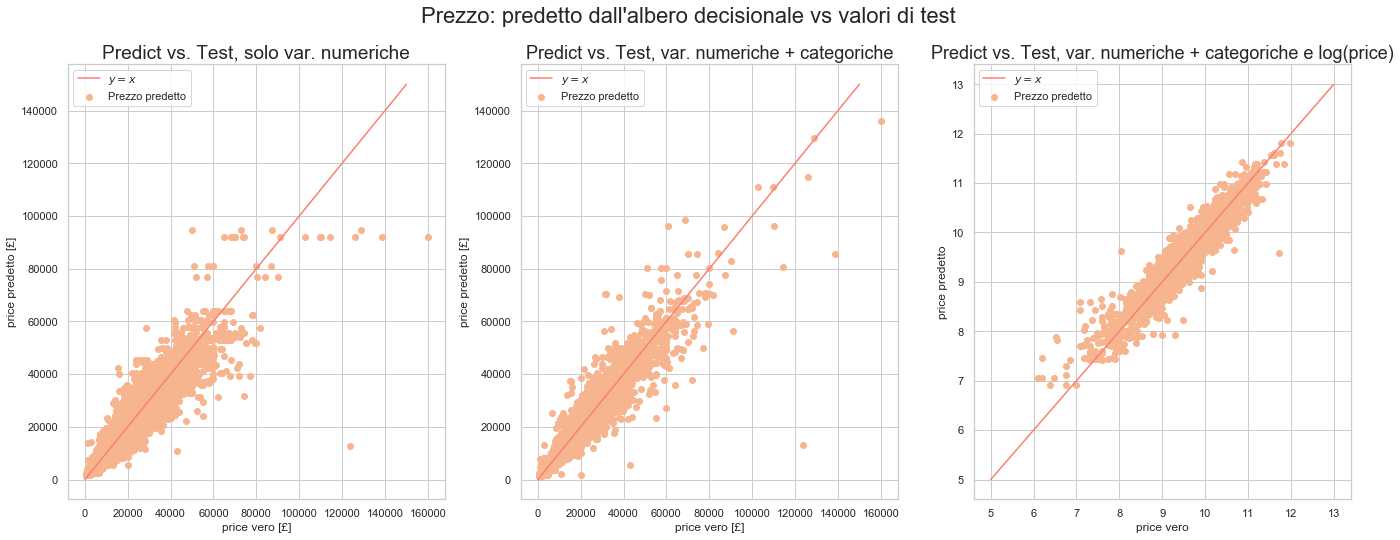

In [26]:
fig, ax = plt.subplots(1, 3, figsize= (23, 8))
fig.suptitle("Prezzo: predetto dall'albero decisionale vs valori di test", fontsize=22)

ax[0].scatter(Y1_test, y_test_p_dt_1, label='Prezzo predetto')
ax[0].plot(np.arange(0, 150000), np.arange(0, 150000), color='salmon', label=r'$y= x$')
ax[0].set_xlabel("price vero [£]")
ax[0].set_ylabel("price predetto [£]")
ax[0].set_title("Predict vs. Test, solo var. numeriche", fontsize=19)
ax[0].legend()

ax[1].scatter(Y2_test, y_test_p_dt_2, label='Prezzo predetto')
ax[1].plot(np.arange(0, 150000), np.arange(0, 150000), color='salmon', label=r'$y= x$')
ax[1].set_xlabel("price vero [£]")
ax[1].set_ylabel("price predetto [£]")
ax[1].set_title("Predict vs. Test, var. numeriche + categoriche", fontsize=18)
ax[1].legend()

ax[2].scatter(Y3_test, y_test_p_dt_3, label='Prezzo predetto')
ax[2].plot(np.arange(5, 14), np.arange(5, 14), color='salmon', label=r'$y= x$')
ax[2].set_xlabel("price vero")
ax[2].set_ylabel("price predetto")
ax[2].set_title("Predict vs. Test, var. numeriche + categoriche e log(price)", fontsize=18)
ax[2].legend()

plt.show()

Tutti e 3 i casi danno buoni risultati, soprattutto se confrontati con la regressione lineare vista nel paragrafo precedente:
- usando solo **variabili numeriche**, il miglior risultato che si ottiene con alberi decisionali è con $\alpha = 0$, cioè niente pruning e con almeno 25 campionamenti per foglia finale (anche se i risultati sono molto simili a quelli con gli altri numeri di min_samples_leafs), ottenendo una *variance score* di $R^2 = 0.87$. Per la regressione invece, usando solo le 5 variabili numeriche e come variabile di output *price* e *log(price)* si otteneva rispettivamente solo $R^2 = 0.72$ e $R^2 = 0.79$, quindi le performance del Decision Tree regressor sono decisamente migliori. Ciò si può anche vedere confrontando i MAE ottenuti: **MAE**$_{Tree} = 2196.17$ da confrontare con **MAE**$_{RL} = 3292.18$ che si otteneva dalla RL usando log(price). 
- introdurre anche le **variabili categoriche** nel modello porta a un miglioramento delle performance (come ci si poteva aspettare dato che si stanno introducendo nuove informazioni). Ciò accadeva già nel modello di regressione lineare dove usando anche $log(price)$ come variabile di output si otteneva un $R^2 = 0.89$. Con i Decision Trees usare *price* o *log(price)* in output non fa molta differenza, dato che in un caso si ottiene $R^2 = 0.93$ e nell'altro $R^2 = 0.94$: entrambi i modelli sono quindi molto buoni nel predire il prezzo delle macchine usate date le varie caratteristiche di input, come si può anche vedere dai grafici del prezzo predetto vs prezzo reale riportati qui sopra, in cui praticamente tutte le macchine si trovano in posizioni molto vicine alla bisettrice del primo quadrante. Nel caso in cui si utilizza *price* in output, non c'è una vera differenza nei modelli variando il valore di $\alpha$, mentre usando log(price) l'unico modello ben funzionante è quello senza pruning, cioè con $\alpha = 0$. Per quanto riguarda il parametro `min_samples_leaf`, nel caso di uso di *price*, il valore migliore corrisponde a `min_samples_leaf` $= 5$ e nel caso in cui si utilizza $log(price)$ si ha `min_samples_leaf` $ = 7$ anche se le performance sono molto simili per gli altri valori di `min_samples_leaf`. Anche i valori ottenuti del Mean Squared Error indicano questo miglioramento, dato che **MAE**$_{Tree} = 1457.88$ da confrontare con **MAE**$_{RL} = 2340.70$ che si otteneva dalla RL usando log(price) e tutte le variabili di input. 

## 5 - Regressione con Random Forests
Dato che i risultati ottenuti con gli Alberi Decisionali sono molto buoni, ho provato a usare una *Random Forest* per vedere se ci fosse ancora un margine di miglioramento. Le *Random forests* fanno parte dei metodi chiamati di *Ensemble Learning*: una serie di Decision Trees viene trainata su diversi *bootstrap samples* del dataset; i risultati ottenuti dai diversi Trees vengono mediati per migliorare l'accuratezza della previsione. Ho provato quindi diverse *Random Forests* cambiando il numero di alberi con il parametro `n_estimators` e il minimo numero di campioni nelle foglie finali in ogni singolo *Tree* con il parametro `min_samples_leaf`. Non ho applicato nessun pruning perchè, come visto nei risultati del paragrafo precedente, l'accuratezza delle previsioni non cambia o non migliora sensibilmente al variare del parametro $\alpha$. Ho replicato ciò per due diversi casi:
- nel primo caso utilizzo solo le variabili numeriche *'engineSize', 'year', 'mileage', 'mpg', 'tax'*;
- nel secondo utilizzo anche tutte le altre caratteristiche categoriche ottenute dalla procedura di OneHotEncoding. 


- Solo variabili numeriche:
number of trees = 	1.0
min_leaf = 	3
r2 test score = 0.8905
Mean Absolute Error : MAE = 2004.79


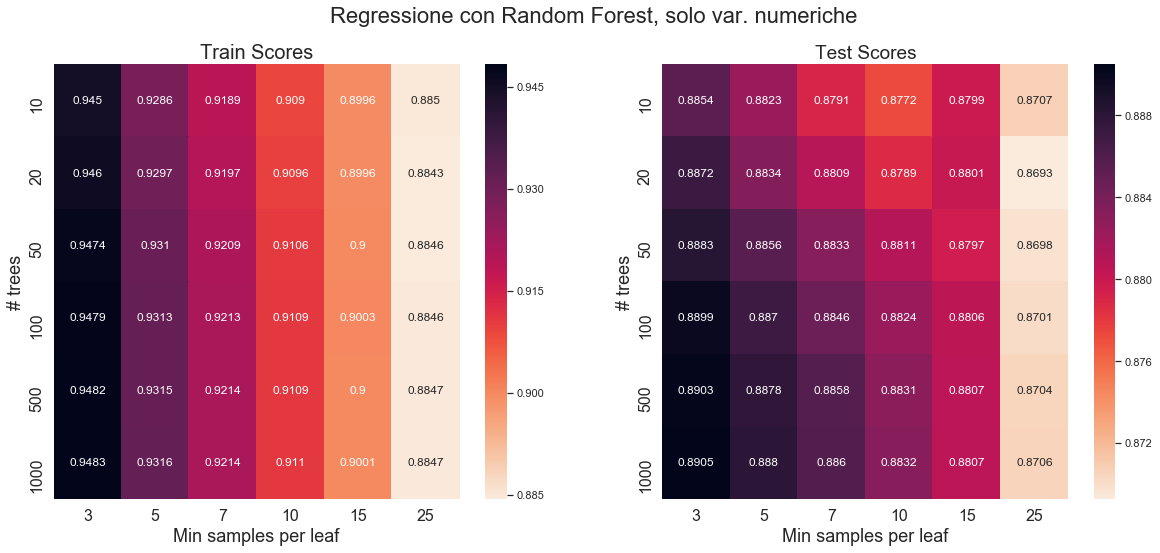

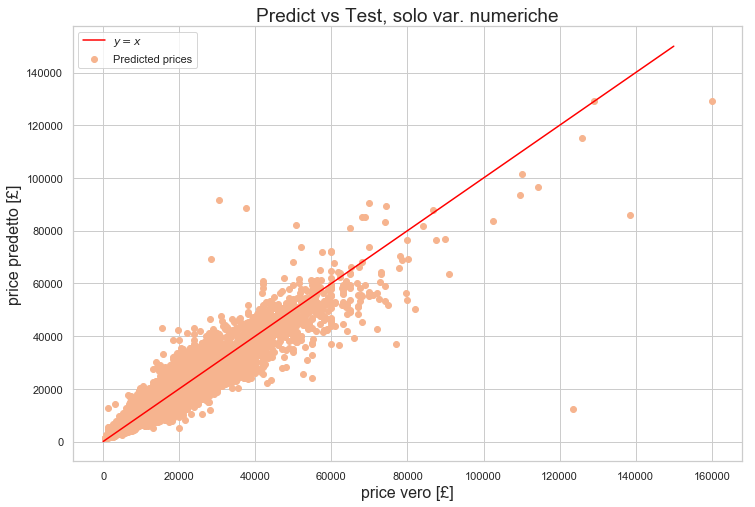

In [27]:
from sklearn.ensemble import RandomForestRegressor
RS2 = 1
min_leafs = [3, 5, 7, 10, 15, 25]
n_trees = [10, 20, 50, 100, 500, 1000]

r2_train_rf_1 = np.zeros((len(n_trees),len(min_leafs)))
r2_test_rf_1 = np.zeros((len(n_trees),len(min_leafs)))

MAE1 = 0.0
best_score_1 = 0.0

for i,n in enumerate(n_trees):
    for j,l in enumerate(min_leafs):
        rf1 = RandomForestRegressor(n_estimators=n, min_samples_leaf=l, random_state=RS2)
        rf1.fit(X1_train, Y1_train)
        # TRAIN
        r2_train_rf_1[i,j] = rf1.score(X1_train, Y1_train)
        # TEST
        r2_test_rf_1[i,j] = rf1.score(X1_test, Y1_test)
        
        if r2_test_rf_1[i,j] > best_score_1:
            y_test_p_rf_1 = rf1.predict(X1_test)
            best_c1, best_l1, best_score_1, MAE1 = c, l, r2_test_rf_1[i,j], mean_absolute_error(Prezzi1, y_test_p_rf_1)
            
print("- Solo variabili numeriche:")
print("number of trees = \t{}".format(best_c1))
print("min_leaf = \t{}".format(best_l1))
print("R2 test score = {:.4f}".format(best_score_1))
print('Mean Absolute Error : MAE = %.2f' % MAE1)

fs = 18
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Regressione con Random Forest, solo var. numeriche", fontsize=fs+4)

ax[0] = sns.heatmap(r2_train_rf_1, annot=True, ax=ax[0], xticklabels = min_leafs, yticklabels=n_trees, 
                    fmt='.4', cmap='rocket_r')

ax[0].set_title("Train Scores", fontsize=fs+2)
ax[0].set_xlabel("Min samples per leaf", fontsize=fs)
ax[0].set_ylabel("# trees", fontsize=fs)

ax[0].tick_params(labelsize=fs-2)

ax[1] = sns.heatmap(r2_test_rf_1, annot=True, ax=ax[1], xticklabels = min_leafs, yticklabels=n_trees, 
                    fmt='.4', cmap='rocket_r')

ax[1].set_title("Test Scores", fontsize=19)
ax[1].set_xlabel("Min samples per leaf", fontsize=fs)
ax[1].set_ylabel("# trees", fontsize=fs)

ax[1].tick_params(labelsize=fs-2)

plt.show()

plt.scatter(Y1_test, y_test_p_rf_1, label='Predicted prices')
plt.plot(np.arange(0, 150000), np.arange(0, 150000), color='red', label=r'$y= x$')
plt.xlabel("price vero [£]", fontsize= 16)
plt.ylabel("price predetto [£]", fontsize= 16)
plt.title("Predict vs Test, solo var. numeriche", fontsize=19)
plt.legend()
plt.show()

- Sia variabili numeriche che categoriche:
number of trees = 	1000
min_leaf = 	3
R2 test score = 0.9426
Mean Absolute Error : MAE = 1316.91


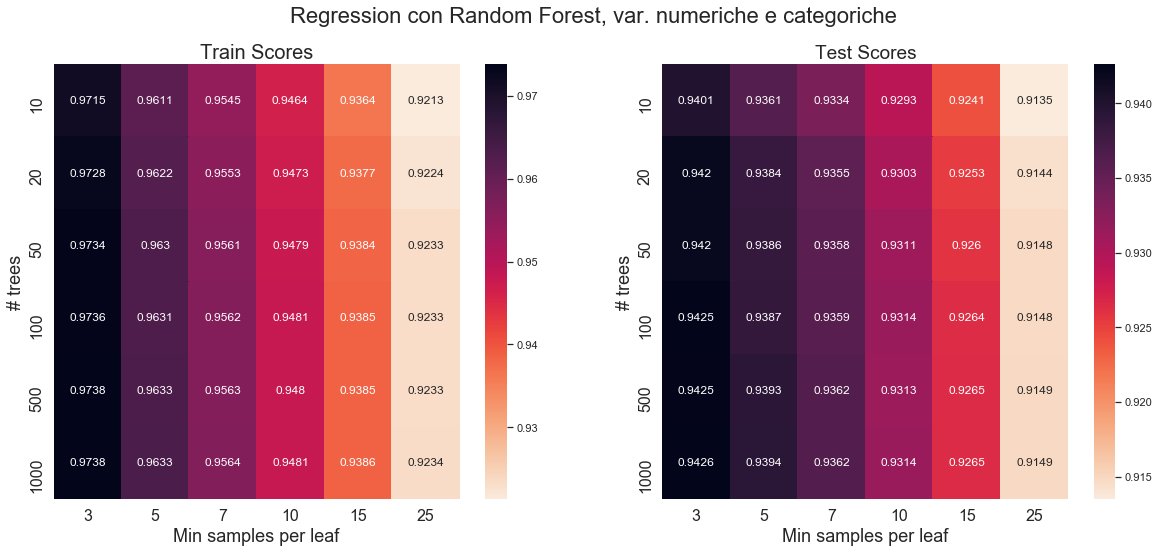

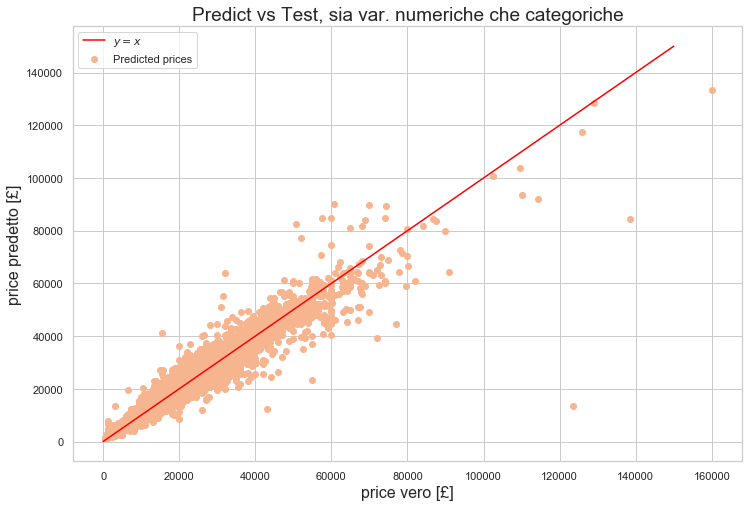

In [28]:
min_leafs = [3, 5, 7, 10, 15, 25]
n_trees = [10, 20, 50, 100, 500, 1000]

r2_train_rf_2 = np.zeros((len(n_trees),len(min_leafs)))
r2_test_rf_2 = np.zeros((len(n_trees),len(min_leafs)))

MAE2 = 0.0
best_score_2 = 0.0

for i,n in enumerate(n_trees):
    for j,l in enumerate(min_leafs):
        rf2 = RandomForestRegressor(n_estimators=n, min_samples_leaf=l, random_state=RS2)
        rf2.fit(X2_train, Y2_train)
        # TRAIN
        r2_train_rf_2[i,j] = rf2.score(X2_train, Y2_train)
        # TEST
        r2_test_rf_2[i,j] = rf2.score(X2_test, Y2_test)
        
        if r2_test_rf_2[i,j] > best_score_2:
            y_test_p_rf_2 = rf2.predict(X2_test)
            best_c2, best_l2, best_score_2, MAE2 = n, l, r2_test_rf_2[i,j], mean_absolute_error(Prezzi2, y_test_p_rf_2)
            
print("- Sia variabili numeriche che categoriche:")
print("number of trees = \t{}".format(best_c2))
print("min_leaf = \t{}".format(best_l2))
print("R2 test score = {:.4f}".format(best_score_2))
print('Mean Absolute Error : MAE = %.2f' % MAE2)

fs = 18
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Regression con Random Forest, var. numeriche e categoriche", fontsize=fs+4)

ax[0] = sns.heatmap(r2_train_rf_2, annot=True, ax=ax[0], xticklabels = min_leafs, yticklabels=n_trees, 
                    fmt='.4', cmap='rocket_r')

ax[0].set_title("Train Scores", fontsize=fs+2)
ax[0].set_xlabel("Min samples per leaf", fontsize=fs)
ax[0].set_ylabel("# trees", fontsize=fs)

ax[0].tick_params(labelsize=fs-2)

ax[1] = sns.heatmap(r2_test_rf_2, annot=True, ax=ax[1], xticklabels = min_leafs, yticklabels=n_trees, 
                    fmt='.4', cmap='rocket_r')

ax[1].set_title("Test Scores", fontsize=19)
ax[1].set_xlabel("Min samples per leaf", fontsize=fs)
ax[1].set_ylabel("# trees", fontsize=fs)

ax[1].tick_params(labelsize=fs-2)

plt.show()

plt.scatter(Y2_test, y_test_p_rf_2, label='Predicted prices')
plt.plot(np.arange(0, 150000), np.arange(0, 150000), color='red', label=r'$y= x$')
plt.xlabel("price vero [£]", fontsize= 16)
plt.ylabel("price predetto [£]", fontsize= 16)
plt.title("Predict vs Test, sia var. numeriche che categoriche", fontsize=19)
plt.legend()
plt.show()

I risultati ottenuti sono molto buoni:
- usando solo **variabili numeriche**, si ottiene una *variance score* di $R^2 = 0.89$ considerando `min_samples_leaf` = 3 per ogni numero di *Trees* considerato, e anche per `min_samples_leaf` = 5 e 7, considerando almeno 50 Trees e 500 Trees rispettivamente. Il risultato è leggermente migliore rispetto a quello ottenuto con un singolo albero decisionale con $\alpha = 0$, cioè niente pruning e con 25 samples per foglie finali che otteneva una *variance score* di $0.87$. Anche MAE indica questo miglioramento passando da **MAE** $\sim 2197$ (per il singolo tree) a **MAE** $\sim 2005$.
- introdurre anche le **variabili categoriche** nel modello porta a un miglioramento delle performance rispetto all'utilizzo delle sole variabili numeriche, ma non a un sensibile  miglioramento rispetto a un singolo Tree. Infatti nello scorso paragrafo con i Decision Trees con *price* o *log(price)* in output si otteneva $r^2 = 0.93$ nel primo caso e $r^2 = 0.94$ nell'altro. Con le *random forests* si ottiene $r^2 = 0.94$ considerando `min_samples_leaf` = 3, 5 per ogni numero di *Trees* e `min_samples_leaf` = 7 considerando almeno 20 Trees. Dato che i risultati sono praticamente confrontabili, non sembra che utilizzare delle *random forests* al posto di un singolo Tree porti a risultati nettamente migliori per questo particolare problema, quindi probabilmente considerando il bilancio tra costi computazionali e risultati sembra essere meglio considerare il modello più semplice di un singolo albero decisionale.

## 7 - Regressione usando una Neural Network
Le reti neurali sono diventate strumenti molto potenti nell'ambito del *Machine Learning*: ne esistono di diversi tipi in base all'utilizzo che se ne vuole fare come ad esempio:
- Feed Forward Neural Networks (FFNN) anche dette MultiLayer Perceptrons (MLPs) in cui gli input passano attraverso diversi strati di neuroni (input layer, hidden layers e output layer) in cui ogni strato eccita quello successivo fino allo strato finale dove si ottiene l'output della rete, andando sempre da sinistra verso destra. Quando tutti i nodi di un layer sono connessi a tutti quelli dello strato precedente e del successivo queste reti vengono dette *Fully Connected NN*;
- le Convolutional Neural Networks (CNNs) invece utilizzano principalmente strati convoluzionali collegati solo in maniera locale e ciò le rende perfette per il riconoscimento di immagini;
- nelle Recurrent Neural Networks (RNNs) invece l'informazione può anche tornare indietro da strati di neuroni successivi a strati precedenti e ciò le rende perfette per lo studio di serie temporali, riconoscimento di serie vocali. 

Una delle versioni del **teorema di approssimazione universale** afferma che le reti feed-forward multistrato standard con un singolo strato nascosto con un numero finito di neuroni nascosti possono approssimare bene a piacere qualsiasi funzione continua $f: R^d \rightarrow R^D$ (nel nostro caso $d = 5$ se consideriamo solo le var. numeriche, altrimenti $d = 21$ e $D = 1$ in quanto abbiamo un'unica variabile di output y), considerando alcune ipotesi come sulla funzione di attivazione. 

Ho quindi deciso di provare qualche esempio di semplice rete neurale con questa forma base del teorema per vedere già a questo livello le performance e le potenzialità delle reti neurali:
- ho creato una rete neurale con un solo hidden layer con $N = 256$ neuroni, usando in input solo le 5 variabili numeriche;
- ho creato una rete neurale con un solo hidden layer con $N = 256$ neuroni, usando in input sia le 5 variabili numeriche che le altre variabili categoriche per un totale di 21 input;

I risultati ottenuti non sono buoni quanto quelli ottenuti con **Alberi Decisionali** e **Random Forests**, ma sono almeno confrontabili con quelli ottenuti nei modelli di **Regressione Lineare** visti nel Paragrafo 2:
- nel primo caso usando solo le 5 variabili numeriche si ottiene un **MAE**$_{NN} \sim 3200$ sul dataset di test, mentre nei casi di regressione lineare usando solo le variabili numeriche e *price* e *log(price)* in output si ottenevano dei Mean Absolute Error rispettivamente di **MAE**$_{RL}= 3552.69$ e **MAE**$_{RL}= 3292.18$.
- nel secondo caso usando anche tutte le altre variabili categoriche si ha un miglioramento delle performance, arrivando a un **MAE**$_{NN} \sim 2450 $ sul dataset di test che può essere confrontato con **MAE** $= 2340.70$ ottenuto usando tutte le 21 variabili numeriche e categoriche nel modello di regressione lineare alla fine del Paragrafo 3. 

Chiaramente le reti implementate sono molto semplici, tra le più semplici possibili, in quanto utilizzano 1 solo *hidden layer* con un numero nemmeno troppo elevato di neuroni e quindi di parametri. Questo paragrafo voleva quindi essere giusto un test per implementare e verificare un altro possibile metodo con cui studiare il *dataset* a cui siamo interessati: per rendere accurati a piacere questi modelli di regressione usando una *neural network* bisognerebbe studiare casi via via più complicati usando più neuroni o più *hidden layers*.

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

RS=42
X1 = df_AllVar[['engineSize', 'year', 'mileage', 'mpg', 'tax']] 
Y1 = df_AllVar['price']
X1_train_full, X1_test, Y1_train_full, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=RS)
X1_train, X1_valid, Y1_train, Y1_valid = train_test_split(X1_train_full, Y1_train_full, test_size = 0.15, random_state=RS)

print(X1_train.shape[1])
#display(X1_train)
#display(Y1_train)
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = X1_train.shape[1], activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
history = NN_model.fit(X1_train, Y1_train, epochs=100, batch_size=32, validation_data=(X1_valid, Y1_valid))

5
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 257       
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________
Train on 67087 samples, validate on 11840 samples
Epoch 1/100
67087/67087 [==============================] - 5s 71us/sample - loss: 6059.6529 - mean_absolute_error: 6059.6572 - val_loss: 5886.6402 - val_mean_absolute_error: 5886.6396
Epoch 2/100
67087/67087 [==============================] - 5s 69us/sample - loss: 5705.1330 - mean_absolute_error: 5705.1357 - val_loss: 5601.38

In [43]:
X2 = df_AllVar[['Automatic','Manual','Semi-Auto', 'Diesel','Electric','Hybrid','Petrol', 'Audi', 'BMW', 'Ford', 'Hyundai','Mercedes', 'Skoda','Toyota', 'Vauxhall','Volkswagen','year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y2 = df_AllVar['price']
X2_train_full, X2_test, Y2_train_full, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=RS)
X2_train, X2_valid, Y2_train, Y2_valid = train_test_split(X2_train_full, Y2_train_full, test_size = 0.15, random_state=RS)

print(X2_train.shape[1])
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(128, kernel_initializer='normal',input_dim = X2_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model2.summary()

history2 = NN_model2.fit(X2_train, Y2_train, epochs=100, batch_size=32, validation_data=(X2_valid, Y2_valid))

21
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total params: 36,097
Trainable params: 36,097
Non-trainable params: 0
_________________________________________________________________
Train on 67087 samples, validate on 11840 samples
Epoch 1/100
67087/67087 [==============================] - 5s 82us/sample - loss: 6001.5693 - mean_absolute_error: 6001.5664 - val_loss: 5506.0722 - val_mean_absolute_error: 5506.0708
Epoch 2/100
67087/67087 [==============================] - 5s 70us/sample - loss: 5151.3556 - mean_absolute_error: 5151.3521 - val_loss: 5239.9

- Valutazione della NN usando solo var. numeriche sul dataset di test:
19732/19732 [==============================] - 1s 36us/sample - loss: 3259.6271 - mean_absolute_error: 3259.6270
- Valutazione della NN usando sia var. numeriche che categoriche sul dataset di test:
19732/19732 [==============================] - 1s 32us/sample - loss: 2436.4532 - mean_absolute_error: 2436.4536


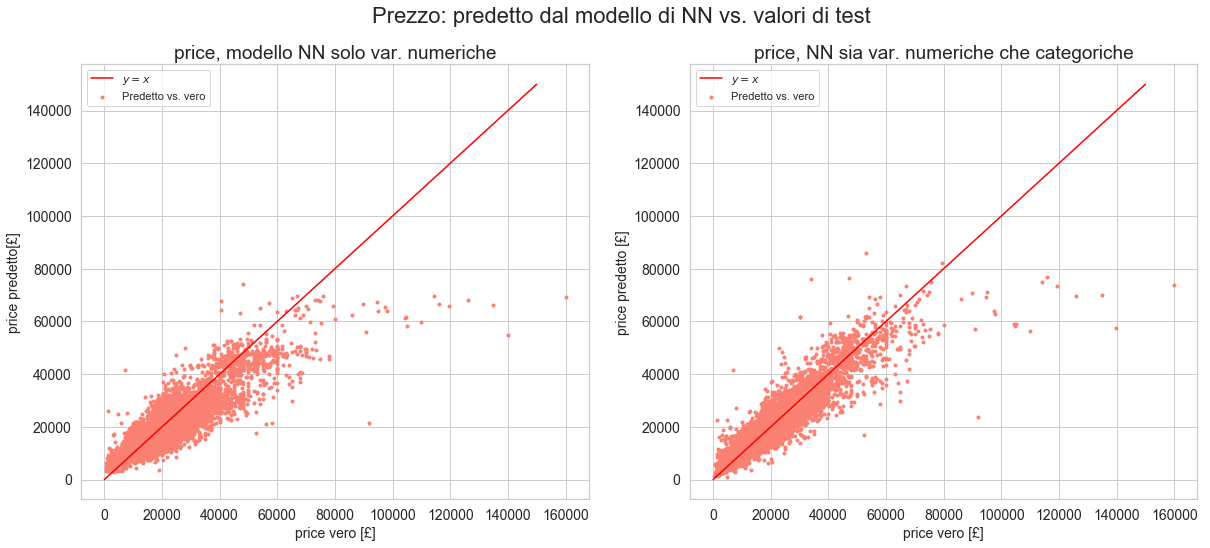

In [51]:
print("- Valutazione della NN usando solo var. numeriche sul dataset di test:")
mae_test = NN_model.evaluate(X1_test, Y1_test)
Y1_pred = NN_model.predict(X1_test)

print("- Valutazione della NN usando sia var. numeriche che categoriche sul dataset di test:")
mae_test2 = NN_model2.evaluate(X2_test, Y2_test)
Y2_pred = NN_model2.predict(X2_test)

fs=14
fig, ax = plt.subplots(1, 2, figsize= (20, 8))
fig.suptitle("Prezzo: predetto dal modello di NN vs. valori di test", fontsize=22)

ax[0].scatter(Y1_test, Y1_pred, label='Predetto vs. vero', color='salmon', marker='.')
ax[0].plot(np.arange(0, 150000), np.arange(0, 150000), color='red', label=r'$y= x$')

ax[0].set_title("price, modello NN solo var. numeriche", fontsize=19)
ax[0].set_xlabel("price vero [£]", fontsize=fs)
ax[0].set_ylabel("price predetto[£]", fontsize=fs)

ax[0].tick_params(labelsize=fs)
ax[0].legend()

ax[1].scatter(Y2_test, Y2_pred, label='Predetto vs. vero', color='salmon',  marker='.')
ax[1].plot(np.arange(0,150000), np.arange(0, 150000), color='red', label=r'$y= x$')

ax[1].set_title("price, NN sia var. numeriche che categoriche", fontsize=19)
ax[1].set_xlabel("price vero [£]", fontsize=fs)
ax[1].set_ylabel("price predetto [£]", fontsize=fs)

ax[1].tick_params(labelsize=fs)
ax[1].legend()

plt.show()

## 7 - Conclusioni
Dall'analisi riportata nei paragrafi precedenti si evince che il migliore metodo tra quelli riportati per studiare il dataset di macchine usate in questione è usando **Alberi Decisionali**: essi infatti restituiscono le migliori *performance* con un'accuratezza ottenuta di $R^2 = 0.94$, essendo anche molto facili da implementare e veloci da trainare. Le **Random Forests** funzionano molto bene ma pagando un costo computazionale maggiore per cui si possono continuare a preferire gli Alberi Decisionali. Il metodo di **Regressione Lineare** del Paragrafo 3 e le **Reti Neurali** del Paragrafo 6 sono altri strumenti molto potenti che in questo caso funzionano peggio; in generale è bene studiare i dataset con più metodi perché le performance possono dipendere molto dalle caratteristiche (come correlazione tra gli input, statistica, range dei parametri) del *dataset* studiato e quindi non è detto che il risultato migliore sia sempre dato da **Decision Trees** come in questo studio. 

## Referenze
(1) *"The Elements of Statistical Learning: Data Mining, Inference, and Prediction."* T. Hastie, R. Tibshirani, J. Friedman

(2) *"Hands-on Machine Learing with Scikit-Learn, Keras & Tensorflow."* Aurélien Géron 

(3) [Hands-on Machine Learing, GitHub](https://github.com/ageron/handson-ml2)  

(4) *"Machine Learning: a Probabilistic Perspective."* Kevin P. Murphy

(5) [GitLab del corso di MLA](https://gitlab.com/cbarbieri/MachineLearning-con-applicazioni)

(6) [100,000 UK Used Car Data set](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)